<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
        <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
            1.1. Problem Description
    </h2>
        <p style='padding-left: 20px; padding-bottom: 20px'>
        The challenge is to develop an AI model capable of classifying chest X-ray images into two categories:<br>
            <span style='font-weight:bold; color:orange'>Normal</span> (Healthy Lungs) <span style='font-weight:bold; color:orange'>Pneumonia</span> (Infected Lungs) <br>The primary goal is to analyze chest X-ray images using deep learning techniques to detect pneumonia with high accuracy, aiding in early diagnosis and improving healthcare outcomes.
    </p>
        <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
            1.2. Type of Problem
    </h2>
        <p style='padding-left: 20px; padding-bottom: 20px'>
        This is a binary classification problem, where the model needs to determine whether an X-ray image shows signs of pneumonia or not.
    </p>
        <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
            1.3. Potential Challenges
    </h2>
        <p style='padding-left: 20px; padding-bottom: 20px'>
        Image Quality: Variations in image quality may affect model performance.
        Class Similarity: Some pneumonia-infected images may resemble normal ones, making classification harder.
        Data Imbalance: The dataset might have more images in one category, leading to model bias.
        Medical Interpretability: Ensuring that the model learns relevant medical patterns rather than irrelevant artifacts.
    </p>
        <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
            1.4. Objective
    </h2>
        <p style='padding-left: 20px; padding-bottom: 20px'>
        The goal is to build a deep learning model that can:
        Extract patterns from chest X-ray images to differentiate between normal and pneumonia cases.
        Achieve high classification accuracy comparable to or better than traditional diagnosis.
        Assist in medical diagnosis by providing reliable predictions to support healthcare professionals.
    </p>

</div>





<h1 style="color: #63B3ED; font-size: 28px; font-weight: 600; padding-bottom: 8px; border-bottom: 2px solid #4299E1; margin-top: 25px;">
   2. Environment Setup
</h1>
This section prepares the environment by importing necessary libraries and defining constants for the image classification task.


<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
        2.1. Import libraries
</h2>
    </h2>

</div>


<h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    Core Data Processing Libraries
</h3>
General-purpose libraries for data manipulation, visualization, and utility functions

In [34]:
import pandas as pd              # Data manipulation and analysis
import numpy as np               # Numerical computations and array handling
import matplotlib.pyplot as plt  # Basic plotting and visualization
import math
import seaborn as sns            # Enhanced statistical visualizations
import os                        # Filesystem operations
import cv2                       # OpenCV for image processing
from PIL import Image            # Image handling and manipulation
from itertools import chain      # Utility for flattening iterables

<h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    Machine Learning Utilities
</h3>
Scikit-learn tools for evaluation metrics and class weight computation


In [35]:
from sklearn.utils.class_weight import compute_class_weight  # Balancing class weights
from sklearn.metrics import (                                # Model evaluation metrics
    confusion_matrix, classification_report, accuracy_score,
    precision_score, recall_score, f1_score
)
from sklearn.model_selection import train_test_split


 <h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    TensorFlow/Keras Deep Learning Framework
</h3>
Core Keras imports for building, training, and evaluating neural networks


In [36]:
from tensorflow.keras.models import load_model, Model, Sequential  # Model creation and loading
from tensorflow.keras import layers, regularizers, Model
from tensorflow.keras.optimizers import Adamax, SGD               # Optimization algorithms
from tensorflow.keras.regularizers import l2                      # Regularization for preventing overfitting
from tensorflow.keras.utils import to_categorical, plot_model     # Data preprocessing and model visualization
from tensorflow.keras.callbacks import (                          # Training callbacks
    EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
)
from tensorflow.keras.preprocessing.image import img_to_array

<h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    Image Preprocessing and Data Augmentation
</h3>
Tools for loading and augmenting image data

In [37]:
from tensorflow.keras.preprocessing import image_dataset_from_directory  # Dataset loading from directories
from tensorflow.keras.preprocessing.image import ImageDataGenerator     # Real-time data augmentation

<h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    Pretrained Models
</h3>
Transfer learning models from Keras Applications


In [38]:
from tensorflow.keras.applications import (                      # Classic pretrained CNN architectures
    VGG16, EfficientNetB0, InceptionV3, MobileNetV2, DenseNet121
)
from tensorflow.keras.applications.efficientnet import EfficientNetB0  # EfficientNet model

<h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    Miscellaneous
</h3>
Bỏ qua các Warnings, xuất thông tin CPU và GPU

In [39]:
import warnings
warnings.filterwarnings('ignore')
!nvidia-smi -L
!lscpu |grep 'Model name' 
!python --version

GPU 0: Tesla T4 (UUID: GPU-49fce349-1a60-4487-0dad-c24fe80e554d)
GPU 1: Tesla T4 (UUID: GPU-a2487402-4d0a-b1f4-1399-97b06b2dbb99)
Model name:                           Intel(R) Xeon(R) CPU @ 2.00GHz
Python 3.11.11


<h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    Styling
</h3>
Set a professional style for consistency and readability


In [40]:
sns.set_palette("deep")  # Subtle, professional color scheme

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
    2.2. Định nghĩa các hằng số       
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
    Các giá trị không đổi sử dụng trong quá trình xây dựng model được thể hiện như sau.
</p>
</div>


In [41]:
H, W = 224, 224
IMG_SIZE = (H, W)                      # Standard input size for pretrained models
IMG_SHAPE = (H, W, 3)
BATCH_SIZE = 32                        # Number of samples per gradient update
EPOCHS = 10                            # Maximum training iterations
LEARNING_RATE = 0.0001                 # Initial learning rate for optimizers
CLASS_NAMES = ['NORMAL', 'PNEUMONIA']  # Example class labels pneumonia
CLASS_COUNT = len(CLASS_NAMES)

<h1 style="color: #63B3ED; font-size: 28px; font-weight: 600; padding-bottom: 8px; border-bottom: 2px solid #4299E1; margin-top: 25px;">
    3. Tiền xử lý dữ liệu
</h1>

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
    3.1. Load data
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
    load data from kaggle data sets , combine all the images in one data frame 
</p>
</div>


In [42]:
import os
import pandas as pd

# Define the base directory where your data is stored (adjust this path)
base_dir = "/kaggle/input/chest-xray-pneumonia/chest_xray/"  # e.g., "C:/pneumonia_project/data"

# List of dataset splits
splits = ["test", "train", "val"]
labels = ["NORMAL", "PNEUMONIA"]

# Initialize lists to store file paths and labels
file_paths = []
file_labels = []

# Loop through each split (train, valid, test)
for split in splits:
    split_dir = os.path.join(base_dir, split)
    # Loop through each label (normal, pneumonia)
    for label in labels:
        label_dir = os.path.join(split_dir, label)
        
        # Check if the directory exists
        if os.path.exists(label_dir):
            # Get all files in the label directory
            for file_name in os.listdir(label_dir):
                # Ensure it's a file (not a directory)
                if os.path.isfile(os.path.join(label_dir, file_name)):
                    # Add the full file path and corresponding label
                    file_paths.append(os.path.join(label_dir, file_name))
                    file_labels.append(label)

# Create a DataFrame with 'name' and 'label' columns
df = pd.DataFrame({
    "name": file_paths,
    "label": file_labels
})

# Optional: Save to a CSV file
df.to_csv("pneumonia_dataset.csv", index=False)
print("DataFrame saved as 'pneumonia_dataset.csv'")

DataFrame saved as 'pneumonia_dataset.csv'


In [43]:
df.head()

name   label
0  /kaggle/input/chest-xray-pneumonia/chest_xray/...  NORMAL
1  /kaggle/input/chest-xray-pneumonia/chest_xray/...  NORMAL
2  /kaggle/input/chest-xray-pneumonia/chest_xray/...  NORMAL
3  /kaggle/input/chest-xray-pneumonia/chest_xray/...  NORMAL
4  /kaggle/input/chest-xray-pneumonia/chest_xray/...  NORMAL

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
    3.2. Split the data
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
Split data into 70% <span style='font-weight:bold; color:orange'>training</span> , 20% <span style='font-weight:bold; color:orange'>validation</span> , 10% <span style='font-weight:bold; color:orange'>testing</span>
</p>
</div>




In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Assuming your DataFrame is already created (e.g., from the previous step)
# If not, load it from the CSV:
# df = pd.read_csv("pneumonia_dataset.csv")

# Shuffle the DataFrame
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

# First split: 65% train, 35% remaining
train_df, temp_df = train_test_split(
    df,
    test_size=0.35,  # 35% for valid + test
    stratify=df["label"],  # Ensure label proportions are maintained
    random_state=42
)

# Second split: 20% valid, 10% test (from the original data)
# Since temp_df is 30%, we split it as 2/3 (20%) and 1/3 (10%) of original
valid_df, test_df = train_test_split(
    temp_df,
    test_size=0.4,  # 10/30 = 1/3 for test
    stratify=temp_df["label"],
    random_state=42
)

# Verify the sizes
print(f"Train set: {len(train_df)} samples ({len(train_df)/len(df)*100:.1f}%)")
print(f"Validation set: {len(valid_df)} samples ({len(valid_df)/len(df)*100:.1f}%)")
print(f"Test set: {len(test_df)} samples ({len(test_df)/len(df)*100:.1f}%)")
print(f"Total: {len(train_df) + len(valid_df) + len(test_df)} samples")


# Optional: Save the splits to CSV files
train_df.to_csv("train_split.csv", index=False)
valid_df.to_csv("valid_split.csv", index=False)
test_df.to_csv("test_split.csv", index=False)
print("\nSplits saved as 'train_split.csv', 'valid_split.csv', and 'test_split.csv'")

Train set: 3806 samples (65.0%)
Validation set: 1230 samples (21.0%)
Test set: 820 samples (14.0%)
Total: 5856 samples

Splits saved as 'train_split.csv', 'valid_split.csv', and 'test_split.csv'


<div style="margin: 30px 0; height: 2px; background: linear-gradient(90deg, #2D3748, #4299E1, #2D3748); width: 100%;"></div>

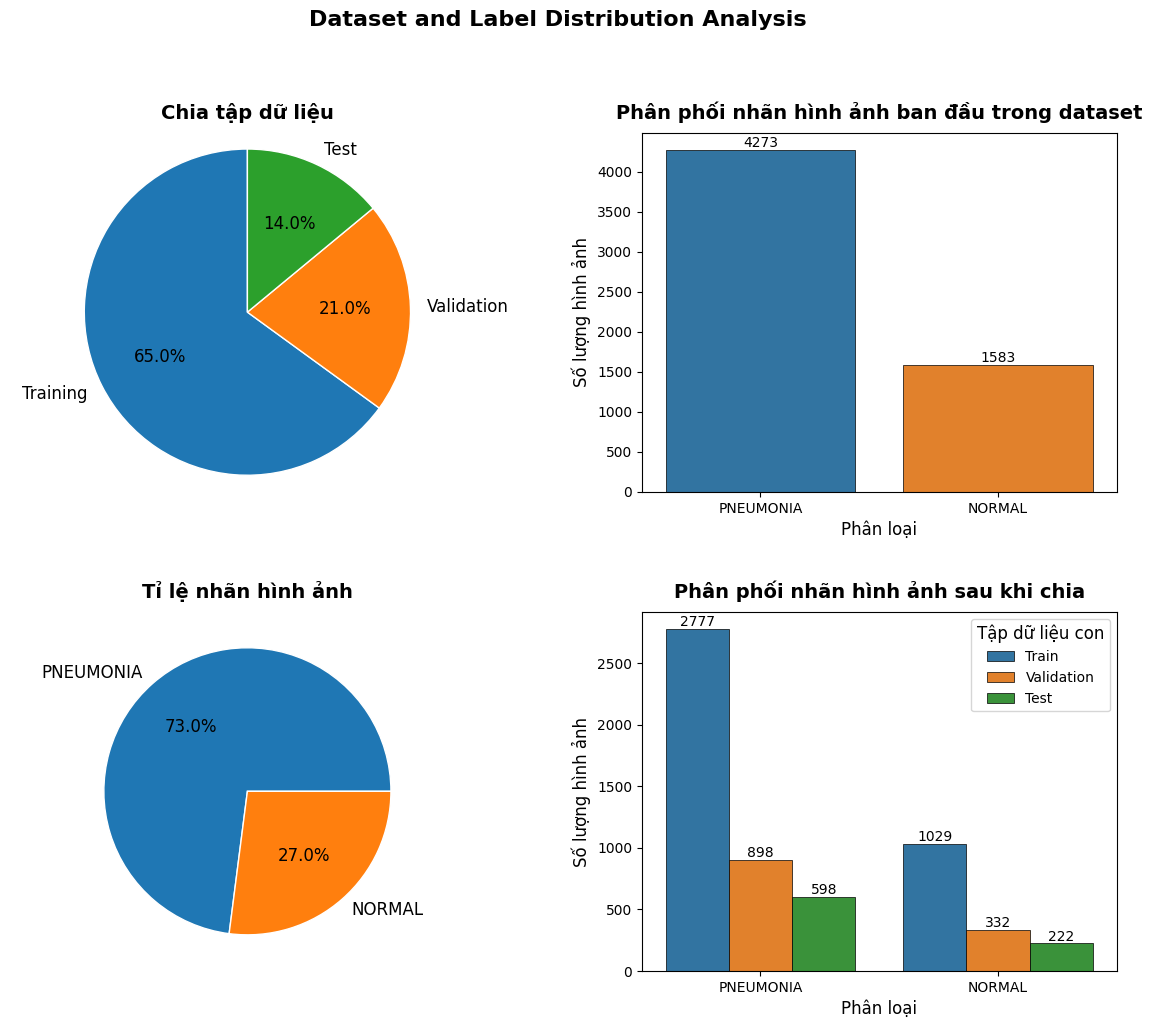

In [45]:
# Initialize the figure with a suitable size for publication or presentation
plt.figure(figsize=(12, 10), dpi=100)
plt.rcdefaults()

# 1. Pie Chart: Dataset Split
plt.subplot(2, 2, 1)
sizes = [len(train_df), len(valid_df), len(test_df)]
labels = ['Training', 'Validation', 'Test']
plt.pie(sizes, labels=labels, autopct=lambda pct: f'{pct:.1f}%', startangle=90, 
        textprops={'fontsize': 12}, wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title('Chia tập dữ liệu', fontsize=14, fontweight='bold', pad=10)
plt.axis('equal')  # Ensures circular pie chart

# 2. Bar Plot: Overall Label Distribution
plt.subplot(2, 2, 2)
ax2 = sns.countplot(x="label", data=df, edgecolor='black', linewidth=0.5)
for p in ax2.patches:
    height = p.get_height()
    if height > 0:  # Only annotate non-zero bars
        ax2.text(
            p.get_x() + p.get_width() / 2., 
            height + 0.5, 
            f'{int(height)}', 
            ha='center', 
            va='bottom', 
            fontsize=10
        )
plt.title("Phân phối nhãn hình ảnh ban đầu trong dataset", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Phân loại", fontsize=12)
plt.ylabel("Số lượng hình ảnh", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# 3. Pie Chart: Label Proportion
plt.subplot(2, 2, 3)
df["label"].value_counts(normalize=True).plot(
    kind="pie", autopct="%1.1f%%", textprops={'fontsize': 12}, 
    wedgeprops={'edgecolor': 'white', 'linewidth': 1})
plt.title("Tỉ lệ nhãn hình ảnh", fontsize=14, fontweight='bold', pad=10)
plt.ylabel("")  # Remove y-label for cleaner look

# 4. Grouped Bar Plot: Label Distribution by Split
plt.subplot(2, 2, 4)
combined_df = pd.concat([
    train_df.assign(split="Train"),
    valid_df.assign(split="Validation"),
    test_df.assign(split="Test")
])

# Create the grouped bar plot
ax = sns.countplot(x="label", hue="split", data=combined_df, edgecolor='black', linewidth=0.5)

# Add numbers above each bar
for p in ax.patches:
    height = p.get_height()
    if height > 0:  # Only annotate bars with a height (avoid empty categories)
        ax.text(
            p.get_x() + p.get_width() / 2.,  # Center of the bar (x-coordinate)
            height + 0.5,                     # Slightly above the bar (y-coordinate)
            f'{int(height)}',                 # The count as an integer
            ha='center',                      # Horizontal alignment: center
            va='bottom',                      # Vertical alignment: bottom
            fontsize=10
        )

# Customize the plot
plt.title("Phân phối nhãn hình ảnh sau khi chia", fontsize=14, fontweight='bold', pad=10)
plt.xlabel("Phân loại", fontsize=12)
plt.ylabel("Số lượng hình ảnh", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title="Tập dữ liệu con", title_fontsize=12, fontsize=10, loc='best')

# Adjust layout for a polished appearance
plt.tight_layout(pad=3.0)
plt.suptitle("Dataset and Label Distribution Analysis", fontsize=16, fontweight='bold', y=1.05)

# Display the plot
plt.show()



<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
        3.3. Data Generator
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
        A data generator is a tool or function in machine learning that efficiently loads, preprocesses, and feeds data (like images) to a model in small batches during training. Instead of loading an entire dataset into memory at once, it processes data on-the-fly, often applying transformations (e.g., resizing, normalization, or augmentation) to improve model performance. In your case, it would take image file paths and labels from a DataFrame (like train_df), prepare them (e.g., resize to 224x224 and scale pixel values), and deliver them in batches for training a model to classify "NORMAL" vs. "PNEUMONIA" 
</p>
</div>




<h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    Apply genenrator
</h3>



In [46]:
# Calculate optimal test batch size
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length % n == 0 and ts_length / n <= 80]))
test_steps = ts_length // test_batch_size
print(f"Test data length: {ts_length}, Test batch size: {test_batch_size}, Test steps: {test_steps}")


# Data generators
tr_gen = ImageDataGenerator()
ts_gen = ImageDataGenerator()

train_gen = tr_gen.flow_from_dataframe(
    train_df, x_col='name', y_col='label', target_size=IMG_SIZE,
    class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=BATCH_SIZE
)
valid_gen = ts_gen.flow_from_dataframe(
    valid_df, x_col='name', y_col='label', target_size=IMG_SIZE,
    class_mode='categorical', color_mode='rgb', shuffle=True, batch_size=BATCH_SIZE
)
test_gen = ts_gen.flow_from_dataframe(
    test_df, x_col='name', y_col='label', target_size=IMG_SIZE,
    class_mode='categorical', color_mode='rgb', shuffle=False, batch_size=test_batch_size
)
print("Class indices:", train_gen.class_indices)

Test data length: 820, Test batch size: 41, Test steps: 20
Found 3806 validated image filenames belonging to 2 classes.
Found 1230 validated image filenames belonging to 2 classes.
Found 820 validated image filenames belonging to 2 classes.
Class indices: {'NORMAL': 0, 'PNEUMONIA': 1}


<h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    Pixel values before generartor
</h3>


In [47]:
# Get a single sample
sample_row = df[df["label"] == label].iloc[0]
img_path = sample_row["name"]

# Before generator: Load raw image
raw_img = Image.open(img_path)
if raw_img.mode != 'RGB':
    raw_img = raw_img.convert('RGB')
raw_img = raw_img.resize(IMG_SIZE, Image.Resampling.LANCZOS)  # Match generator size
raw_array = np.array(raw_img)
print(f"Before Generator (Raw Pixels, Shape: {raw_array.shape}):")
print(raw_array[0, :5, :])  # Print first row, first 5 pixels, all channels

Before Generator (Raw Pixels, Shape: (224, 224, 3)):
[[112 112 112]
 [115 115 115]
 [114 114 114]
 [121 121 121]
 [118 118 118]]


<h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    Pixel values after generartor
</h3>


In [48]:
image_batch, label_batch = next(train_gen)

# Print pixel values after generator
print(f"After Generator (Processed Pixels, Shape: {image_batch.shape}):")
print(image_batch[0, 0, :5])  # First image, first 5 rows, all columns, all channels

After Generator (Processed Pixels, Shape: (32, 224, 224, 3)):
[[61. 61. 61.]
 [64. 64. 64.]
 [76. 76. 76.]
 [80. 80. 80.]
 [82. 82. 82.]]


<h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
    3.4. Visualize some images
</h2>


In [49]:
def plot_sample_images(df, label, num_samples=3, fixed_size=(224, 224)):
    # Filter by label
    label_df = df[df["label"] == label]
    if len(label_df) == 0:
        print(f"No images found for label '{label}'")
        return
    
    # Sample images
    samples = label_df.sample(min(num_samples, len(label_df)))
    
    # Set up a simple, nice-looking figure
    plt.figure(figsize=(3 * num_samples, 4))
    
    # Plot each image
    for i, (idx, row) in enumerate(samples.iterrows()):
        img = Image.open(row["name"])
        if img.mode != 'RGB':
            img = img.convert('RGB')
        img = img.resize(fixed_size, Image.Resampling.LANCZOS)
        
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(img)
        plt.title(f"{label} #{i + 1}", fontsize=12)
        plt.axis("off")
    
    plt.tight_layout()
    plt.show()





Normal Samples:


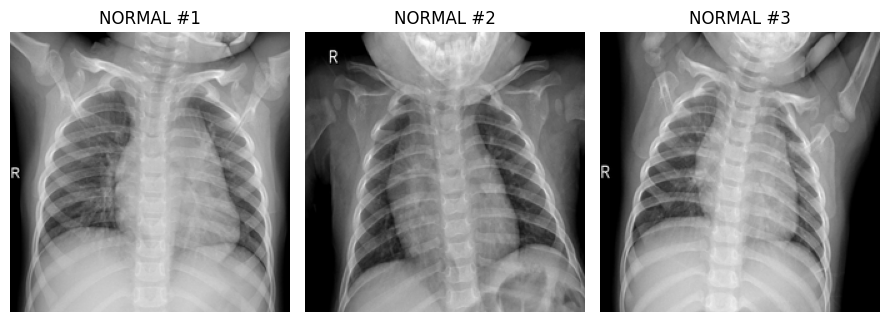


Pneumonia Samples:


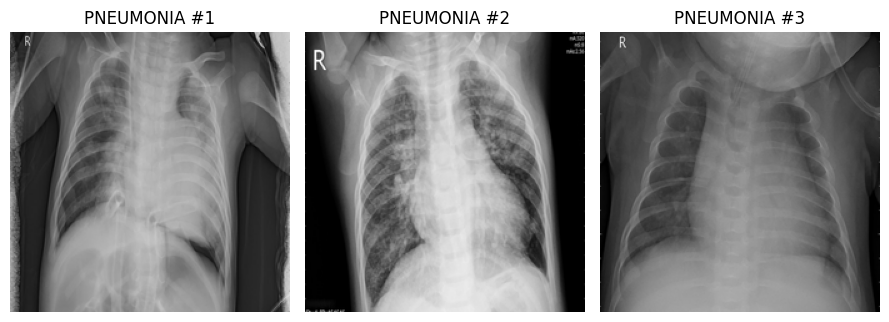

In [50]:
print("\nNormal Samples:")
plot_sample_images(train_df, "NORMAL")

print("\nPneumonia Samples:")
plot_sample_images(train_df, "PNEUMONIA")

<div style="background-color: rgba(74, 85, 104, 0.2); border-left: 4px solid #805AD5; padding: 14px 16px; margin: 15px 0; border-radius: 3px;">
    <h3 style="font-family: 'Source Sans Pro', 'Helvetica Neue', sans-serif; color: #E9D8FD; font-size: 16px; margin: 0 0 5px 0; font-weight: 600;">Now data ready for training</h3>
</div>

<div style="margin: 30px 0; height: 2px; background: linear-gradient(90deg, #2D3748, #4299E1, #2D3748); width: 100%;"></div>

<h1 style="color: #63B3ED; font-size: 28px; font-weight: 600; padding-bottom: 8px; border-bottom: 2px solid #4299E1; margin-top: 25px;">
    4. Build the Model
</h1>
Define nedeed functions and callbacks


<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
    4.1. Callbacks
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
            TensorFlow callbacks are functions that allow you to monitor and control the training process by executing custom 
    actions at specific stages (e.g., after each epoch or batch). Examples include saving models, adjusting learning 
    rates, or stopping training early.
</p>

</div>





In [51]:
# Define callbacks
callbacks = [
    ModelCheckpoint(filepath='/kaggle/working/best_model_V2.keras', monitor='val_accuracy',
                    save_best_only=True, verbose=1,mode='max'),
]

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
        4.2. Compute class weights with manual boost for "normal"
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
    The purpose of class weights is to address class imbalance in the dataset during training. The weights are used to adjust the contribution of each class to the overall loss function and gradient calculation during backpropagation. By assigning higher weights to the minority class and lower weights to the majority class, the model gives more importance to correctly classifying instances from the minority class.
</p>
</div>




In [52]:
# Extract the class names from the generator
classes = list(train_gen.class_indices.keys())  # Ensure the classes are ordered correctly
class_indices = train_gen.class_indices  # Map class names to numerical indices

# Convert textual class labels to numerical values for weight computation
y_numeric = train_df['label'].map(class_indices)

# Compute weights
class_weights = compute_class_weight(class_weight='balanced', classes=np.array(range(len(classes))), y=y_numeric)
class_weight_dict_mapped = dict(zip(class_indices.values(), class_weights))
class_weight_dict_mapped[0] *= 1  # Increase by 20%


<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
    4.3. Visualize model performance
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
        This function, plot_training_history, visualizes the training and validation loss/accuracy over epochs using a line plot. It highlights the best epoch for validation loss and accuracy, making it easier to analyze model performance trends.
</p>
</div>




In [53]:
def plot_training_history(history, figsize=(20, 8)):
    tr_acc = history.history['accuracy']
    tr_loss = history.history['loss']
    val_acc = history.history['val_accuracy']
    val_loss = history.history['val_loss']
    index_loss = np.argmin(val_loss)
    val_lowest = val_loss[index_loss]
    index_acc = np.argmax(val_acc)
    acc_highest = val_acc[index_acc]
    Epochs = [i + 1 for i in range(len(tr_acc))]
    loss_label = f'best epoch= {index_loss + 1} (val_loss={val_lowest:.4f})'
    acc_label = f'best epoch= {index_acc + 1} (val_acc={acc_highest:.4f})'
    
    plt.figure(figsize=figsize)
    plt.subplot(1, 2, 1)
    plt.plot(Epochs, tr_loss, 'r', label='Training loss')
    plt.plot(Epochs, val_loss, 'g', label='Validation loss')
    plt.scatter(index_loss + 1, val_lowest, s=150, c='blue', label=loss_label)
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.subplot(1, 2, 2)
    plt.plot(Epochs, tr_acc, 'r', label='Training Accuracy')
    plt.plot(Epochs, val_acc, 'g', label='Validation Accuracy')
    plt.scatter(index_acc + 1, acc_highest, s=150, c='blue', label=acc_label)
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
    4.4. Model Evaluation
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
        Model evaluation is the process of assessing a machine learning model's performance using metrics like accuracy, precision, recall, and F1-score to ensure it generalizes well to new data.
</p>
</div>



In [54]:
def evaluate_model(valid_gen, model):
    y_true = []
    y_pred = []


    for images, labels in valid_gen:
        preds = model.predict(images, verbose=0)  # Suppress extra output
        batch_y_pred = np.argmax(preds, axis=1)  # Convert probabilities to class labels
        batch_y_true = np.argmax(labels, axis=1)  # Convert one-hot encoding to class labels
        y_true.extend(batch_y_true)
        y_pred.extend(batch_y_pred)

        if len(y_true) >= valid_gen.samples:  # Stop when all data is processed
            break

    # Convert lists to numpy arrays
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)

    # Compute classification metrics
    acc = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average="weighted")
    recall = recall_score(y_true, y_pred, average="weighted")
    f1 = f1_score(y_true, y_pred, average="weighted")

    # Get class names from gen
    class_names = list(valid_gen.class_indices.keys())

    # Print classification report
    print("📊 Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names, digits = 4))

    print(f"✅ Overall Accuracy: {acc*100:.4f}%")
    print(f"✅ Weighted Precision: {precision:.4f}")
    print(f"✅ Weighted Recall: {recall:.4f}")
    print(f"✅ Weighted F1-score: {f1:.4f}")

    # Compute Confusion Matrix
    cf_matrix = confusion_matrix(y_true, y_pred)

    # Plot Confusion Matrix
    group_names = ['True Negative','False Positive','False Negative','True Positive']
    group_counts = ['{0:0.0f}'.format(value) for value in
                    cf_matrix.flatten()]
    group_percentages = ['{0:.2%}'.format(value) for value in
                         cf_matrix.flatten()/np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in
              zip(group_names,group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')  # Hide color bar with cbar=False
    
    return acc, precision, recall, f1

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
    4.5. Create Model
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
    Build and compile a custom model using any pre-trained base from Keras Applications.
</p>
</div>




In [55]:
import tensorflow as tf
from tensorflow.keras import layers, regularizers, Model
from tensorflow.keras.utils import plot_model

def build_custom_model(
    base_model_class,
    img_shape,
    class_count,
    freeze_percentage=0.8,
    weights="imagenet",
    pooling="max",
    learning_rate=0.0001,
    plot_file="model_plot.png"
):
    """
    Build and compile a custom model using any pre-trained base from Keras Applications.

    Args:
        base_model_class: Keras Applications model class (e.g., tf.keras.applications.EfficientNetB0).
        img_shape: Tuple of input image shape (height, width, channels).
        class_count: Number of output classes.
        freeze_percentage: Fraction of base model layers to freeze (0 to 1, default 0.8).
        weights: Pre-trained weights to use (default "imagenet").
        pooling: Pooling method for base model (e.g., 'avg', 'max', None).
        learning_rate: Learning rate for optimizer (default 0.00001).
        plot_file: File path to save model plot (default "model_plot.png").

    Returns:
        Compiled Keras Model.
    """
    # Define input tensor
    inputs = tf.keras.Input(shape=img_shape)

    # Create pre-trained base model
    base_model = base_model_class(
        include_top=False,
        weights=weights,
        input_shape=(img_shape[0], img_shape[1], 3),
        pooling=pooling
    )

    # Freeze a percentage of layers
    total_layers = len(base_model.layers)
    num_freeze = int(total_layers * freeze_percentage)
    for layer in base_model.layers[:num_freeze]:
        layer.trainable = False
    for layer in base_model.layers[num_freeze:]:
        layer.trainable = True

    # Pass input through base model
    x = base_model(inputs)

    # Add custom layers
    x = layers.BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001)(x)
    x = layers.Dense(256, kernel_regularizer=regularizers.l2(0.01),
                     activity_regularizer=regularizers.l1(0.003),
                     bias_regularizer=regularizers.l1(0.003), activation='relu')(x)
    x = layers.Dropout(rate=0.3, seed=123)(x)
    x = layers.Dense(class_count, activation='softmax')(x)

    # Create and compile the model
    model = Model(inputs=inputs, outputs=x)
    model.compile(
        optimizer=tf.keras.optimizers.Adamax(learning_rate=learning_rate),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    # Display summary and save plot
    model.summary()
    plot_model(
        model,
        to_file=plot_file,
        show_shapes=True,
        show_layer_names=True
    )
    print(f"Model plot saved as '{plot_file}'")

    return model



<div style="background-color: rgba(74, 85, 104, 0.2); border-left: 4px solid #805AD5; padding: 14px 16px; margin: 15px 0; border-radius: 3px;">
    <h3 style="font-family: 'Source Sans Pro', 'Helvetica Neue', sans-serif; color: #E9D8FD; font-size: 16px; margin: 0 0 5px 0; font-weight: 600;">Now Time for Train Model</h3>
</div>

<h1 style="color: #63B3ED; font-size: 28px; font-weight: 600; padding-bottom: 8px; border-bottom: 2px solid #4299E1; margin-top: 25px;">
   5. Model Training
</h1>

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
        5.1. VGG16
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
    The VGG16 architecture consists of 16 convolutional layers with small 3x3 filters followed by max pooling layers.  It is a very simple, effective CNN model for image classification tasks.  It is a widely-used baseline for comparison benchmarkingin various image classification tasks.
</p>
</div>


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ vgg16 (Functional)                   │ (None, 512)                 │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_99               │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,848,578 (56.64 MB)

 Trainable params: 132,866 (519.01 KB)

 Non-trainable params: 14,715,712 (56.14 MB)

Model plot saved as 'model_VGG16_plot.png'
Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 276ms/step - accuracy: 0.7542 - loss: 15.0076
Epoch 1: val_accuracy improved from -inf to 0.80325, saving model to /kaggle/working/best_model_V2.keras
119/119 ━━━━━━━━━━━━━━━━━━━━ 51s 382ms/step - accuracy: 0.7544 - loss: 15.0036 - val_accuracy: 0.8033 - val_loss: 16.1363
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 266ms/step - accuracy: 0.8452 - loss: 13.4461
Epoch 2: val_accuracy improved from 0.80325 to 0.89756, saving model to /kaggle/working/best_model_V2.keras
119/119 ━━━━━━━━━━━━━━━━━━━━ 45s 360ms/step - accuracy: 0.8452 - loss: 13.4444 - val_accuracy: 0.8976 - val_loss: 13.1409
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.8546 - loss: 12.5230
Epoch 3: val_accuracy improved from 0.89756 to 0.90488, saving model to /kaggle/working/best_model_V2.keras
119/119 ━━━━━━━━━━━━━━━━━━━━ 45s 363ms/step - accuracy: 0.8546 - loss: 12.5214 - val_accuracy: 0.9049 - val_loss: 11.9749
Epo

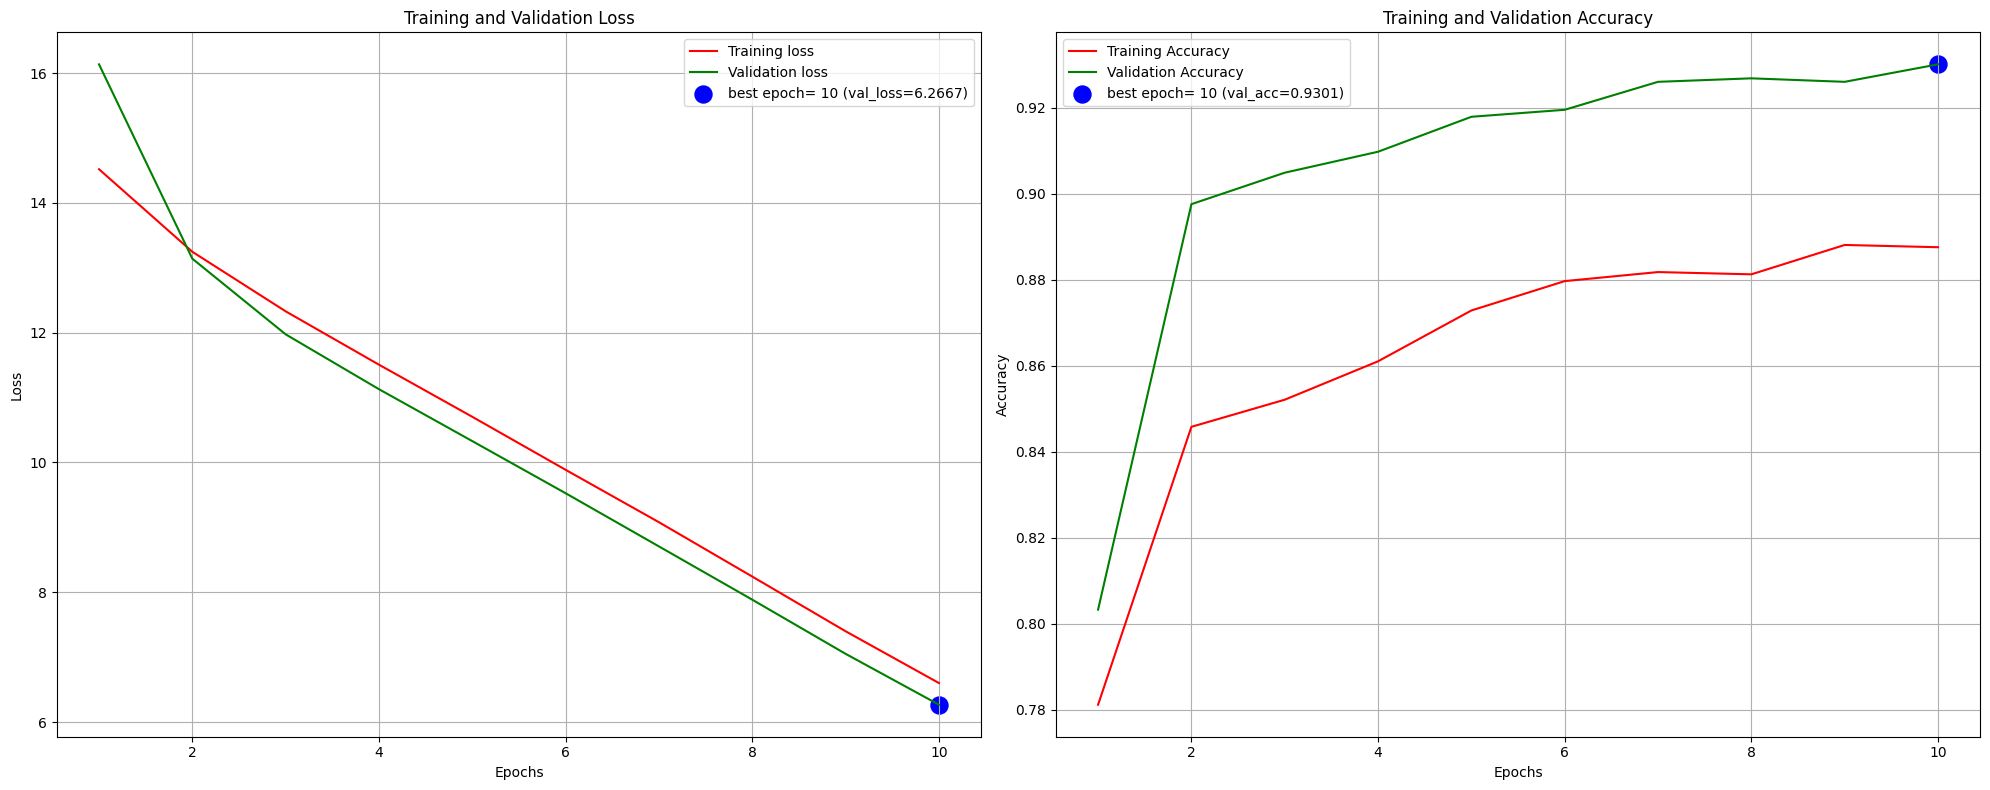

📊 Classification Report:

              precision    recall  f1-score   support

      NORMAL     0.8306    0.9307    0.8778       332
   PNEUMONIA     0.9732    0.9298    0.9510       898

    accuracy                         0.9301      1230
   macro avg     0.9019    0.9303    0.9144      1230
weighted avg     0.9347    0.9301    0.9313      1230

✅ Overall Accuracy: 93.0081%
✅ Weighted Precision: 0.9347
✅ Weighted Recall: 0.9301
✅ Weighted F1-score: 0.9313


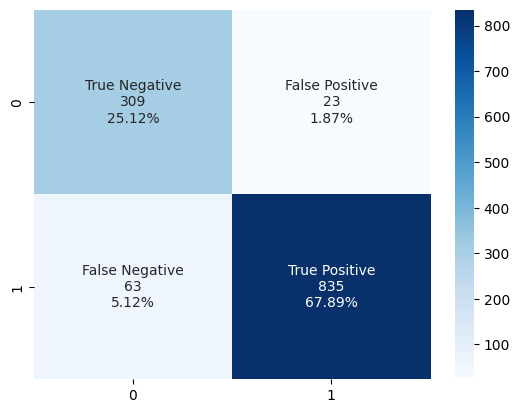

In [56]:
# Build with VGG16
model_VGG16 = build_custom_model(
    VGG16,
    IMG_SHAPE,
    CLASS_COUNT,
    freeze_percentage=1,
    weights="imagenet",
    pooling="max",
    learning_rate=0.0001,
    plot_file="model_VGG16_plot.png"
)
history_VGG16= model_VGG16.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=EPOCHS,
    verbose=1,
    class_weight=class_weight_dict_mapped,  # استخدام class weights
    callbacks=callbacks,  # إضافة callbacks

)
plot_training_history(history_VGG16, figsize=(20, 8))

# Save model
model_VGG16.save('VGG16.keras')
model_VGG16.save('VGG16.h5')

#Evaluate model
VGG16_acc,VGG16_precision,VGG16_recall,VGG16_f1=evaluate_model(valid_gen,model_VGG16 )

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
        5.2. MobileNetV2
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
    The MobileNetV2 architecture is designed for efficient inference on mobile and embedded devices. It uses depthwise separable convolutions to reduce the number of parameters and computations. MobileNetV2 offers a good balance between accuracy and computational efficiency.
</p>
</div>


Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_12 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ mobilenetv2_1.00_224 (Functional)    │ (None, 1280)                │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_100              │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,591,554 (9.89 MB)

 Trainable params: 331,010 (1.26 MB)

 Non-trainable params: 2,260,544 (8.62 MB)

Model plot saved as 'model_MobileNetV2_plot.png'
Epoch 1/10
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 269ms/step - accuracy: 0.5283 - loss: 15.6605
Epoch 1: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 60s 408ms/step - accuracy: 0.5301 - loss: 15.6460 - val_accuracy: 0.8309 - val_loss: 16.2854
Epoch 2/10
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.7403 - loss: 13.1483
Epoch 2: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 43s 343ms/step - accuracy: 0.7407 - loss: 13.1432 - val_accuracy: 0.8374 - val_loss: 12.4276
Epoch 3/10
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8007 - loss: 11.9319
Epoch 3: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 42s 339ms/step - accuracy: 0.8009 - loss: 11.9281 - val_accuracy: 0.8569 - val_loss: 11.2488
Epoch 4/10
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.8251 - loss: 10.9441
Epoch 4: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━

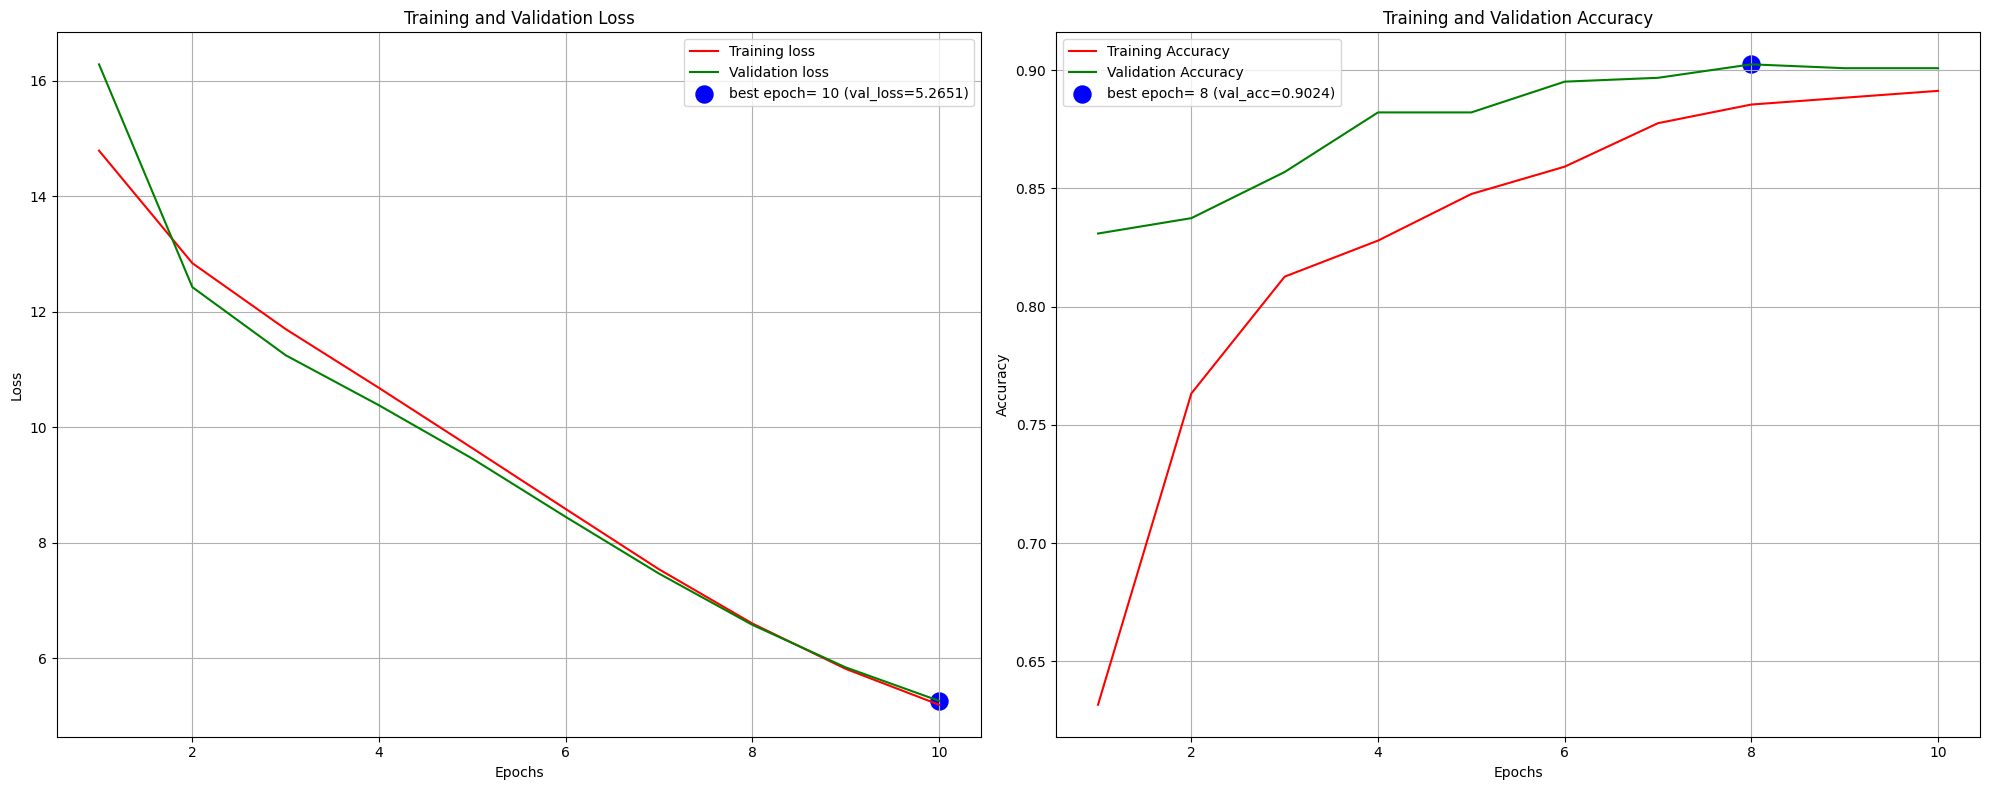

📊 Classification Report:

              precision    recall  f1-score   support

      NORMAL     0.7720    0.8976    0.8301       332
   PNEUMONIA     0.9597    0.9020    0.9300       898

    accuracy                         0.9008      1230
   macro avg     0.8659    0.8998    0.8800      1230
weighted avg     0.9091    0.9008    0.9030      1230

✅ Overall Accuracy: 90.0813%
✅ Weighted Precision: 0.9091
✅ Weighted Recall: 0.9008
✅ Weighted F1-score: 0.9030


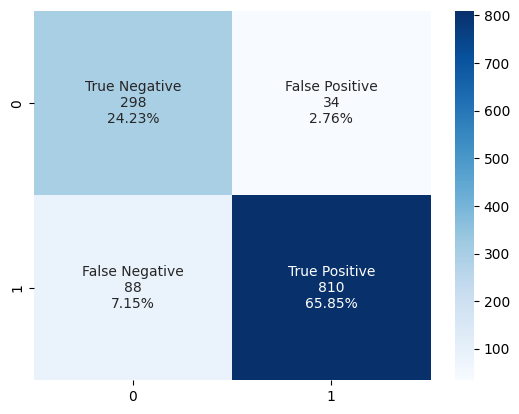

In [57]:
# Build with MobileNetV2
model_MobileNetV2 = build_custom_model(
    MobileNetV2,
    IMG_SHAPE,
    CLASS_COUNT,
    freeze_percentage=1,
    weights="imagenet",
    pooling="max",
    learning_rate=0.0001,
    plot_file="model_MobileNetV2_plot.png"
)
history_MobileNetV2= model_MobileNetV2.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=EPOCHS,
    verbose=1,
    class_weight=class_weight_dict_mapped,  # استخدام class weights
    callbacks=callbacks,  # إضافة callbacks

)
plot_training_history(history_MobileNetV2, figsize=(20, 8))

# Save model
model_MobileNetV2.save('MobileNetV2.keras')
model_MobileNetV2.save('MobileNetV2.h5')

#Evaluate model
MobileNetV2_acc,MobileNetV2_precision,MobileNetV2_recall,MobileNetV2_f1=evaluate_model(valid_gen,model_MobileNetV2 )

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
        5.3. DenseNet
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
    The DenseNet architecture introduces dense connections, where each layer is connected to every other layer in a feed-forward manner. Dense connections facilitate feature reuse, promote gradient flow, and alleviate the vanishing gradient problem. DenseNet has achieved competitive results on image classification tasks and is known for its parameter efficiency.
</p>
</div>


Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_14 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ densenet121 (Functional)             │ (None, 1024)                │       7,037,504 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_101              │ (None, 1024)                │           4,096 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 256)                 │         262,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 7,304,514 (27.86 MB)

 Trainable params: 264,962 (1.01 MB)

 Non-trainable params: 7,039,552 (26.85 MB)

Model plot saved as 'model_DenseNet_plot.png'
Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6891 - loss: 13.6303
Epoch 1: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 93s 538ms/step - accuracy: 0.6896 - loss: 13.6246 - val_accuracy: 0.8049 - val_loss: 13.4186
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.7922 - loss: 11.5883
Epoch 2: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 42s 342ms/step - accuracy: 0.7924 - loss: 11.5853 - val_accuracy: 0.8415 - val_loss: 10.5753
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 258ms/step - accuracy: 0.8439 - loss: 10.2800
Epoch 3: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 43s 346ms/step - accuracy: 0.8439 - loss: 10.2775 - val_accuracy: 0.8756 - val_loss: 9.1934
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 257ms/step - accuracy: 0.8532 - loss: 9.0396
Epoch 4: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 4

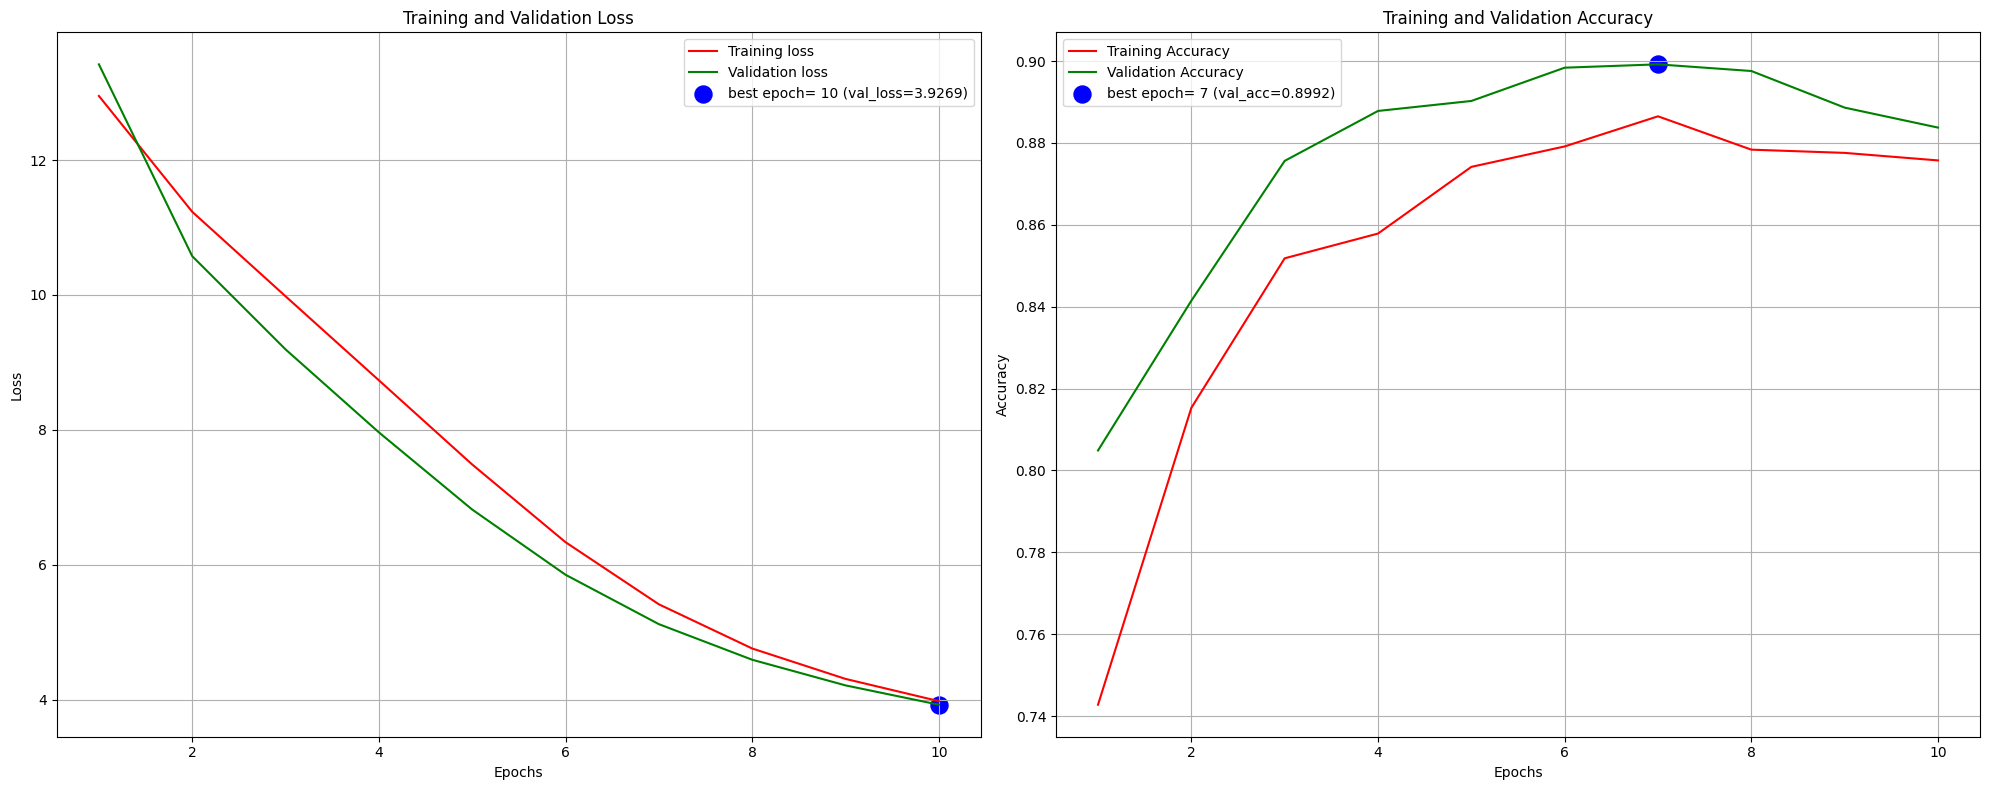

📊 Classification Report:

              precision    recall  f1-score   support

      NORMAL     0.7255    0.9157    0.8096       332
   PNEUMONIA     0.9655    0.8719    0.9163       898

    accuracy                         0.8837      1230
   macro avg     0.8455    0.8938    0.8630      1230
weighted avg     0.9007    0.8837    0.8875      1230

✅ Overall Accuracy: 88.3740%
✅ Weighted Precision: 0.9007
✅ Weighted Recall: 0.8837
✅ Weighted F1-score: 0.8875


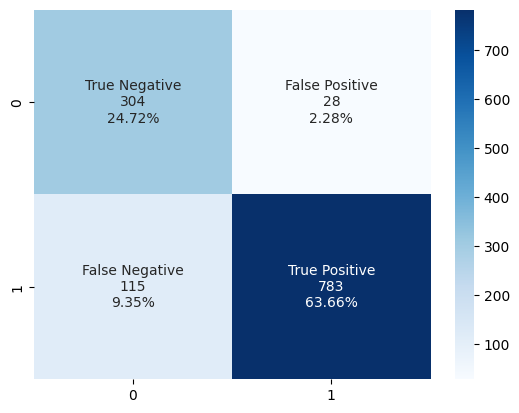

In [58]:
# Build with DenseNet
model_DenseNet = build_custom_model(
    DenseNet121,
    IMG_SHAPE,
    CLASS_COUNT,
    freeze_percentage=1,
    weights="imagenet",
    pooling="max",
    learning_rate=0.0001,
    plot_file="model_DenseNet_plot.png"
)
history_DenseNet= model_DenseNet.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=EPOCHS,
    verbose=1,
    class_weight=class_weight_dict_mapped,  # استخدام class weights
    callbacks=callbacks,  # إضافة callbacks

)
plot_training_history(history_DenseNet, figsize=(20, 8))

# Save model
model_DenseNet.save('DenseNet.keras')
model_DenseNet.save('DenseNet.h5')

#Evaluate model
DenseNet_acc,DenseNet_precision,DenseNet_recall,DenseNet_f1=evaluate_model(valid_gen,model_DenseNet )

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
        5.4. InceptionV3
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
    The InceptionV3 architecture utilizes a combination of convolutional layers with different filter sizes to capture features at multiple scales. It includes the Inception module, which performs parallel convolutions with different filter sizes and concatenates their outputs. InceptionV3 has shown strong performance on image classification tasks, especially for complex datasets.
</p>
</div>


Model: "functional_8"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_16 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ inception_v3 (Functional)            │ (None, 2048)                │      21,802,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_196              │ (None, 2048)                │           8,192 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,336,034 (85.21 MB)

 Trainable params: 529,154 (2.02 MB)

 Non-trainable params: 21,806,880 (83.19 MB)

Model plot saved as 'model_InceptionV3_plot.png'
Epoch 1/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 285ms/step - accuracy: 0.8195 - loss: 14.4067
Epoch 1: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 72s 462ms/step - accuracy: 0.8197 - loss: 14.3961 - val_accuracy: 0.8333 - val_loss: 13.8821
Epoch 2/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 253ms/step - accuracy: 0.8760 - loss: 11.1762
Epoch 2: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 42s 336ms/step - accuracy: 0.8760 - loss: 11.1733 - val_accuracy: 0.8878 - val_loss: 10.5095
Epoch 3/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.8907 - loss: 9.8644
Epoch 3: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 43s 348ms/step - accuracy: 0.8907 - loss: 9.8620 - val_accuracy: 0.9203 - val_loss: 9.0673
Epoch 4/10
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 261ms/step - accuracy: 0.8903 - loss: 8.7084
Epoch 4: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 

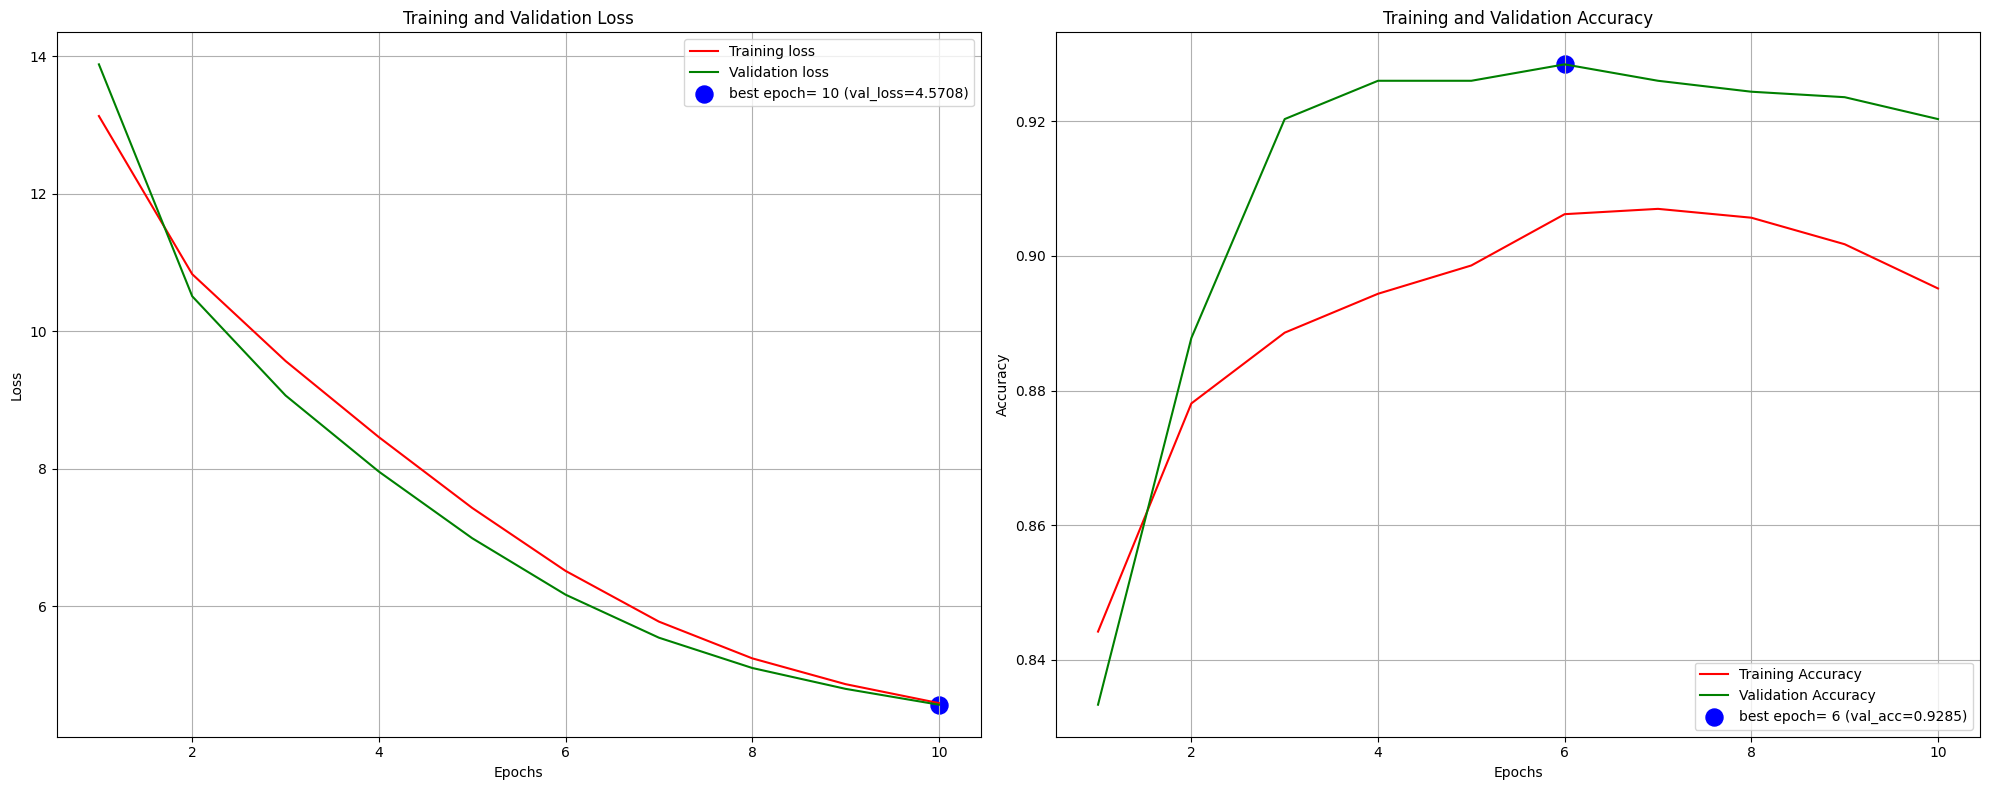

📊 Classification Report:

              precision    recall  f1-score   support

      NORMAL     0.8079    0.9247    0.8624       332
   PNEUMONIA     0.9706    0.9187    0.9439       898

    accuracy                         0.9203      1230
   macro avg     0.8892    0.9217    0.9031      1230
weighted avg     0.9267    0.9203    0.9219      1230

✅ Overall Accuracy: 92.0325%
✅ Weighted Precision: 0.9267
✅ Weighted Recall: 0.9203
✅ Weighted F1-score: 0.9219


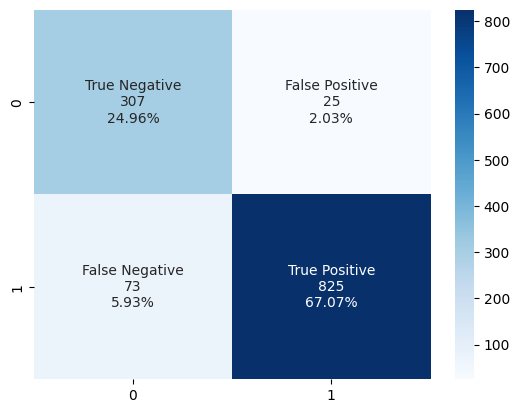

In [59]:
# Build with InceptionV3
model_InceptionV3 = build_custom_model(
    InceptionV3,
    IMG_SHAPE,
    CLASS_COUNT,
    freeze_percentage=1,
    weights="imagenet",
    pooling="max",
    learning_rate=0.0001,
    plot_file="model_InceptionV3_plot.png"
)
history_InceptionV3= model_InceptionV3.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=EPOCHS,
    verbose=1,
    class_weight=class_weight_dict_mapped,  # استخدام class weights
    callbacks=callbacks,  # إضافة callbacks

)
plot_training_history(history_InceptionV3, figsize=(20, 8))

# Save model
model_InceptionV3.save('InceptionV3.keras')
model_InceptionV3.save('InceptionV3.h5')

#Evaluate model
InceptionV3_acc,InceptionV3_precision,InceptionV3_recall,InceptionV3_f1=evaluate_model(valid_gen,model_InceptionV3 )

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
        5.5. EfficientNetB0
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
    The EfficientNetB0 model is a lightweight and efficient convolutional neural network that uses compound scaling to balance depth, width, and resolution. It achieves high accuracy with fewer parameters and is well-suited for image classification tasks, making it a strong baseline for efficient deep learning models.
</p>
</div>


Model: "functional_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_18 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 1280)                │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_197              │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,383,141 (16.72 MB)

 Trainable params: 331,010 (1.26 MB)

 Non-trainable params: 4,052,131 (15.46 MB)

Model plot saved as 'model_EfficientNetB0_plot.png'
Epoch 1/10
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 318ms/step - accuracy: 0.6030 - loss: 16.4321
Epoch 1: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 85s 488ms/step - accuracy: 0.6044 - loss: 16.4189 - val_accuracy: 0.9008 - val_loss: 14.2603
Epoch 2/10
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 256ms/step - accuracy: 0.7809 - loss: 14.0515
Epoch 2: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 43s 341ms/step - accuracy: 0.7813 - loss: 14.0457 - val_accuracy: 0.8927 - val_loss: 12.3279
Epoch 3/10
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.8201 - loss: 12.6926
Epoch 3: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━━━━━━━ 41s 329ms/step - accuracy: 0.8201 - loss: 12.6885 - val_accuracy: 0.9114 - val_loss: 11.3133
Epoch 4/10
118/119 ━━━━━━━━━━━━━━━━━━━━ 0s 259ms/step - accuracy: 0.8509 - loss: 11.5625
Epoch 4: val_accuracy did not improve from 0.93008
119/119 ━━━━━━━━━━━━━━

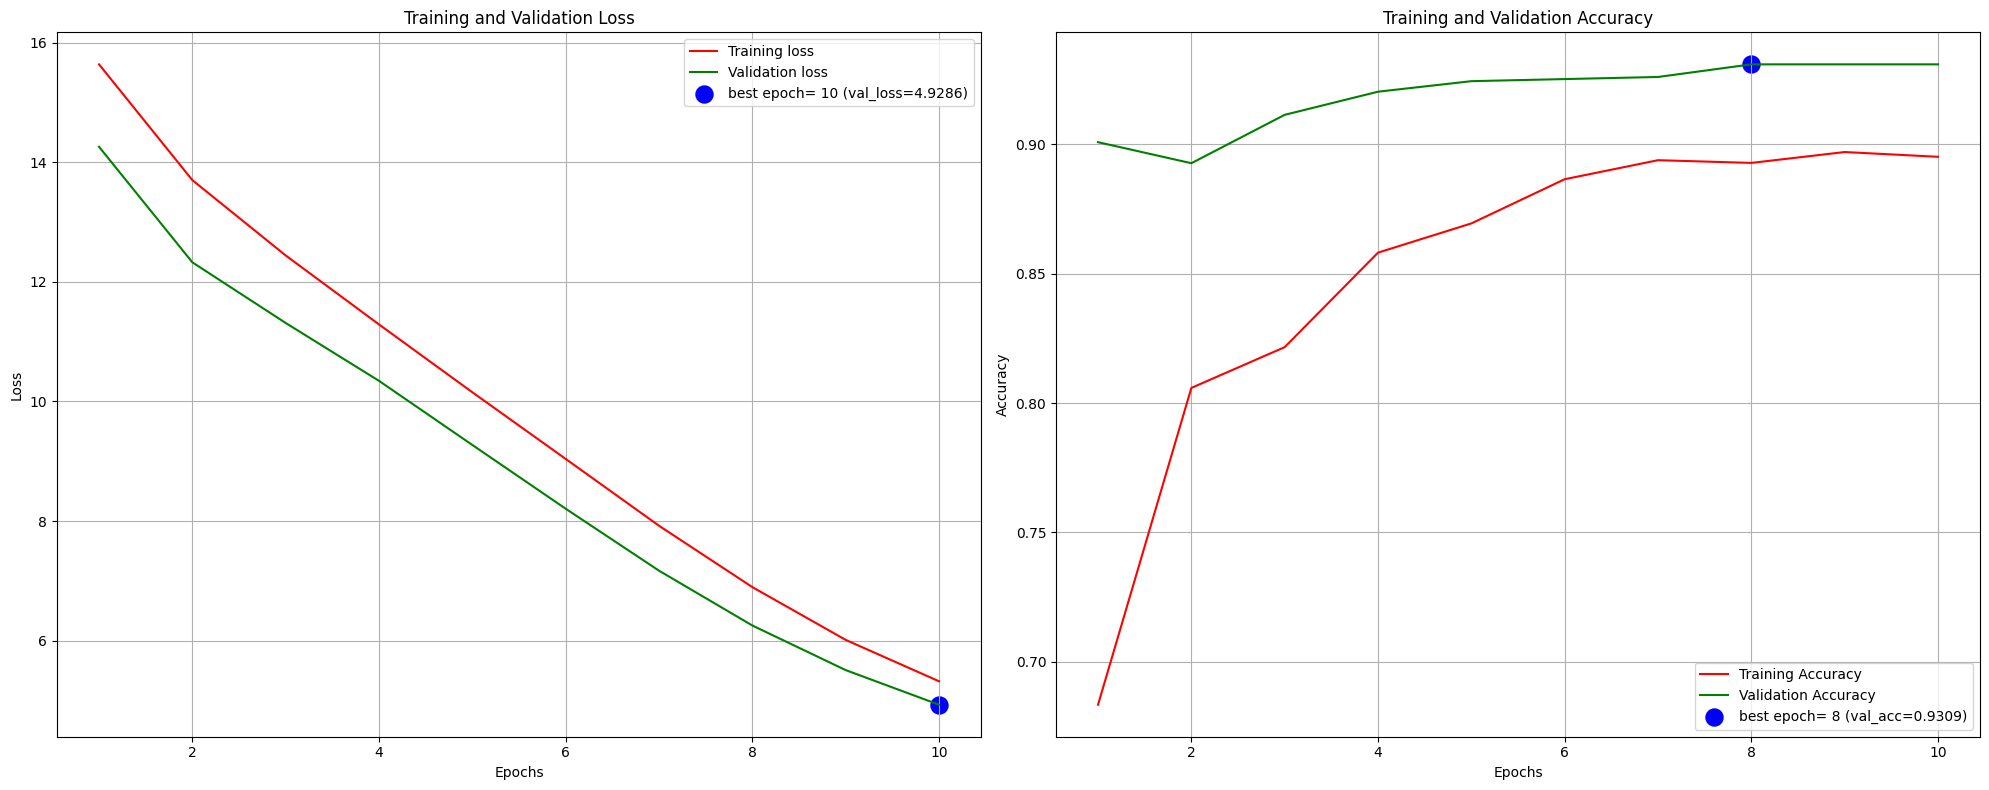

📊 Classification Report:

              precision    recall  f1-score   support

      NORMAL     0.8293    0.9367    0.8798       332
   PNEUMONIA     0.9754    0.9287    0.9515       898

    accuracy                         0.9309      1230
   macro avg     0.9024    0.9327    0.9156      1230
weighted avg     0.9360    0.9309    0.9321      1230

✅ Overall Accuracy: 93.0894%
✅ Weighted Precision: 0.9360
✅ Weighted Recall: 0.9309
✅ Weighted F1-score: 0.9321


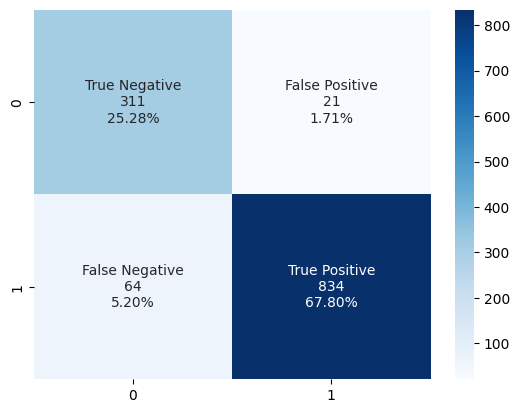

In [60]:
# Build with EfficientNetB0
model_EfficientNetB0 = build_custom_model(
    EfficientNetB0,
    IMG_SHAPE,
    CLASS_COUNT,
    freeze_percentage=1,
    weights="imagenet",
    pooling="max",
    learning_rate=0.0001,
    plot_file="model_EfficientNetB0_plot.png"
)
history_EfficientNetB0= model_EfficientNetB0.fit(
    train_gen,
    validation_data=valid_gen,
    epochs=EPOCHS,
    verbose=1,
    class_weight=class_weight_dict_mapped,  # استخدام class weights
    callbacks=callbacks,  # إضافة callbacks


)
plot_training_history(history_EfficientNetB0, figsize=(20, 8))

# Save model
model_EfficientNetB0.save('EfficientNetB0.keras')
model_EfficientNetB0.save('EfficientNetB0.h5')

#Evaluate model
EfficientNetB0_acc,EfficientNetB0_precision,EfficientNetB0_recall,EfficientNetB0_f1=evaluate_model(valid_gen,model_EfficientNetB0 )

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
        5.6. Compare between models results
    </h2>

</div>


<h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    Convert accuracy values to percentages and round to 2 decimal places
</h3>



In [61]:
Evaluation = {
    'VGG16': [round(VGG16_acc * 100, 2), VGG16_precision, VGG16_recall, VGG16_f1], 
    'MobileNet': [round(MobileNetV2_acc * 100, 2), MobileNetV2_precision, MobileNetV2_recall, MobileNetV2_f1],
    'DenseNet': [round(DenseNet_acc * 100, 2), DenseNet_precision, DenseNet_recall, DenseNet_f1],
    'Inception': [round(InceptionV3_acc * 100, 2), InceptionV3_precision, InceptionV3_recall, InceptionV3_f1],
    'EfficientNetB0': [round(EfficientNetB0_acc * 100, 2), EfficientNetB0_precision, EfficientNetB0_recall, EfficientNetB0_f1]
}

<h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    Create DataFrame
</h3>


In [62]:
df= pd.DataFrame.from_dict(Evaluation, columns=['accuracy (%)','precision','recall','f1'],orient='index')
df=df.sort_values(by='accuracy (%)', ascending=False)
df = df.reset_index().rename(columns={'index': 'model'})
df

model  accuracy (%)  precision    recall        f1
0  EfficientNetB0         93.09   0.936002  0.930894  0.932148
1           VGG16         93.01   0.934717  0.930081  0.931271
2       Inception         92.03   0.926674  0.920325  0.921917
3       MobileNet         90.08   0.909053  0.900813  0.903006
4        DenseNet         88.37   0.900711  0.883740  0.887515

<h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    Visualize Accuracy
</h3>


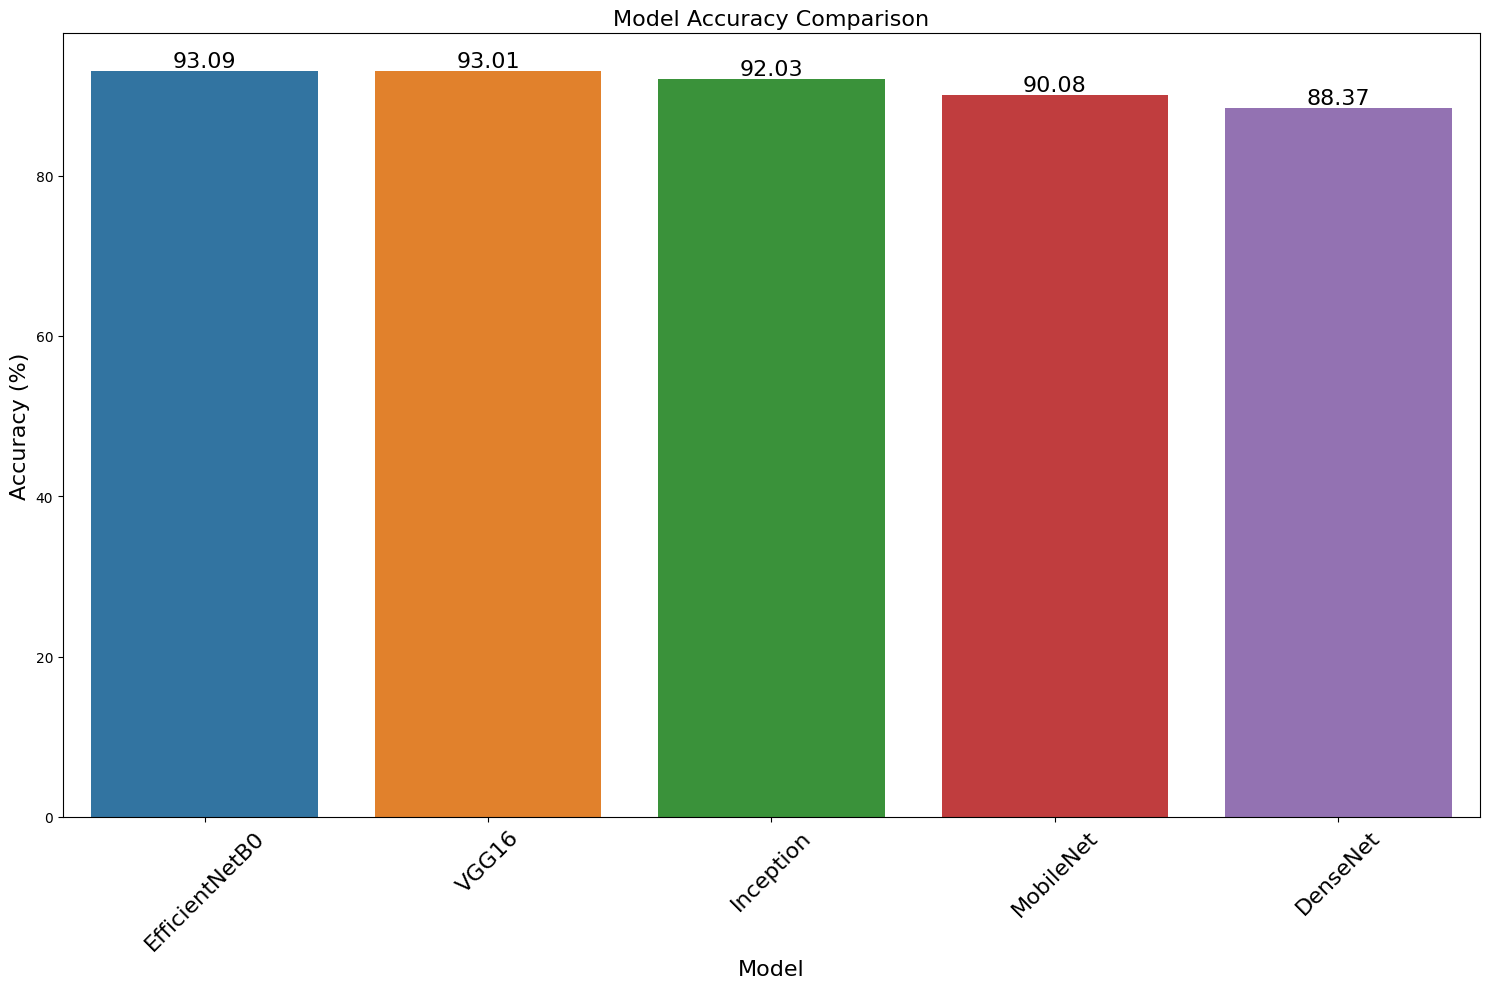

In [63]:
plt.figure(figsize=(15, 10))  # Set figure size

ax = sns.barplot(x='model', y='accuracy (%)', data=df)

# Add labels to bars
ax.bar_label(ax.containers[0], fmt="%.2f", fontsize=16)  # Labels with 2 decimal places

# Labels and layout adjustments
plt.xlabel("Model", fontsize=16)
plt.ylabel("Accuracy (%)", fontsize=16)
plt.title("Model Accuracy Comparison", fontsize=16)
plt.xticks(rotation=45, fontsize= 16) 
plt.tight_layout()
plt.show()


<h3 style="color: #9AE6B4; font-size: 18px; font-weight: 500; margin-top: 18px; padding-left: 10px; border-left: 3px solid #68D391;">
    Visualize precision, recall, f1
</h3>


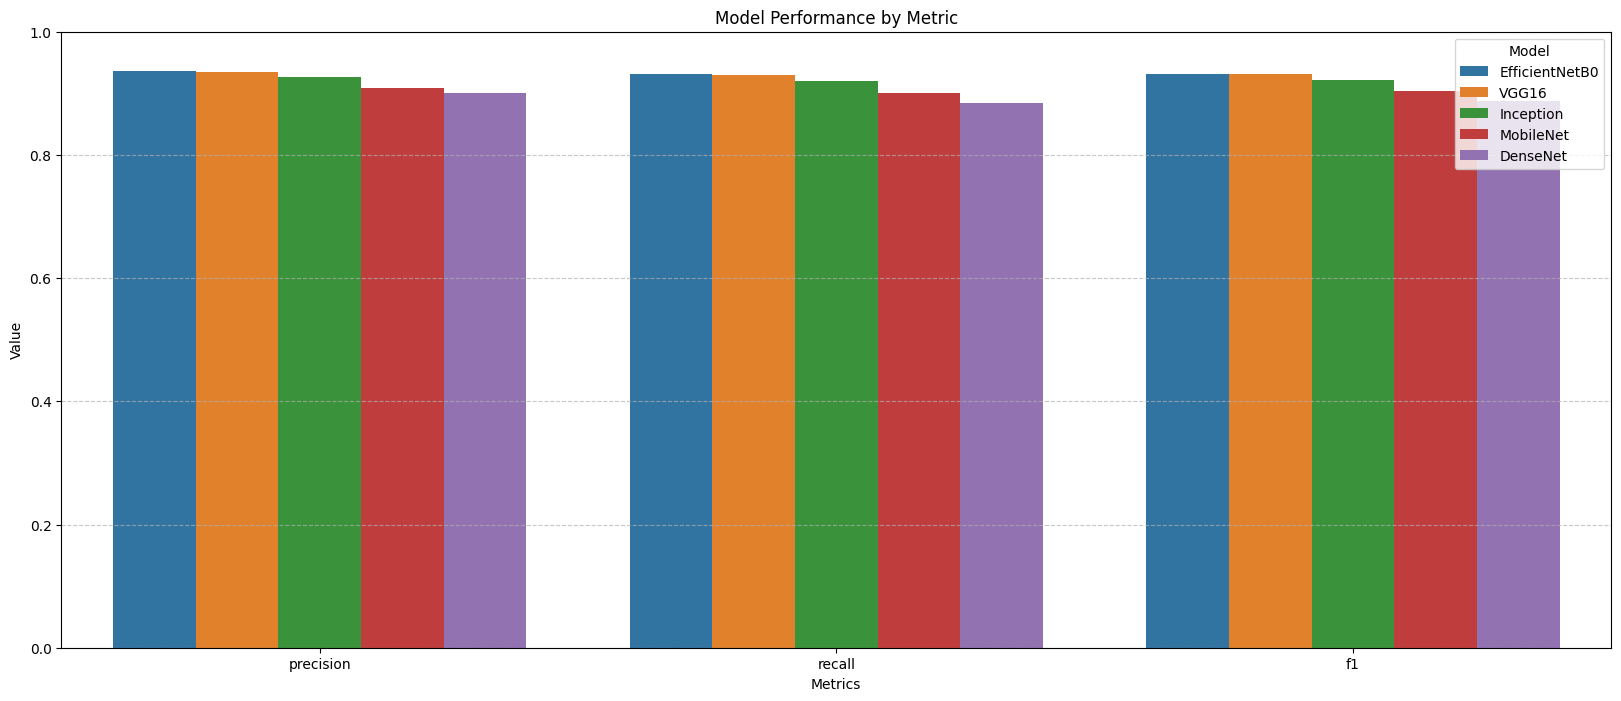

In [64]:
# Convert the data to long format for use in Seaborn
df_melted = df.drop('accuracy (%)', axis= 1).melt(id_vars="model", var_name="Metric", value_name="Value")

# Initializing bar plot
plt.figure(figsize=(20, 8))
sns.barplot(x="Metric", y="Value", hue="model", data=df_melted)

# Improve the plot's appearance
plt.title("Model Performance by Metric")
plt.xlabel("Metrics")
plt.ylabel("Value")
plt.ylim(0, 1)  #Values between 0 and 1 as the metrics are percentages
plt.legend(title="Model")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()

39/39 ━━━━━━━━━━━━━━━━━━━━ 11s 269ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 16s 322ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 36s 657ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 22s 408ms/step
39/39 ━━━━━━━━━━━━━━━━━━━━ 23s 428ms/step


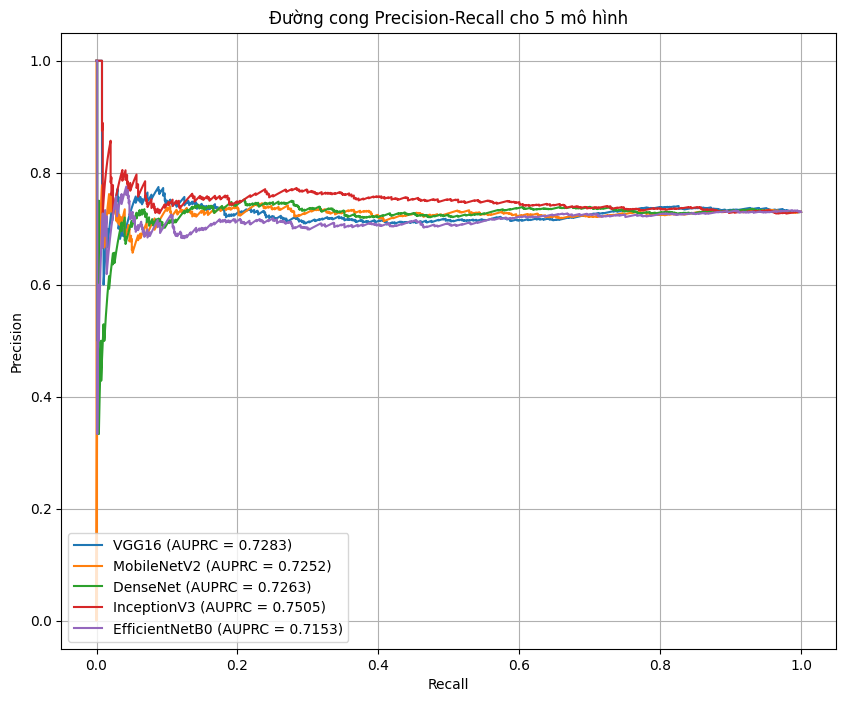

In [65]:
from sklearn.metrics import precision_recall_curve, average_precision_score, auc
import matplotlib.pyplot as plt

# Danh sách các mô hình
models = [model_VGG16, model_MobileNetV2, model_DenseNet, model_InceptionV3, model_EfficientNetB0]
model_names = ['VGG16', 'MobileNetV2', 'DenseNet', 'InceptionV3', 'EfficientNetB0']

plt.figure(figsize=(10, 8))

# Lặp qua từng mô hình để tính toán và vẽ đồ thị
for model, model_name in zip(models, model_names):
    # Dự đoán xác suất trên tập validation
    y_score = model.predict(valid_gen)
    
    # Lấy xác suất cho lớp "PNEUMONIA" (lớp 1)
    y_score = y_score[:, 1]  
    
    # Lấy nhãn thực tế cho lớp "PNEUMONIA"
    y_true = valid_gen.classes 
    
    # Tính toán Precision-Recall curve
    precision, recall, _ = precision_recall_curve(y_true, y_score)
    
    # Tính toán AUPRC
    auprc = auc(recall, precision)
    
    # Vẽ đồ thị Precision-Recall curve
    plt.plot(recall, precision, label=f'{model_name} (AUPRC = {auprc:.4f})')

# Thiết lập các thuộc tính của đồ thị
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Đường cong Precision-Recall cho 5 mô hình')
plt.legend(loc='lower left')
plt.grid(True)

# Hiển thị đồ thị
plt.show()

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
        5.8. Fine-Tuning best model
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
Fine-tuning is the process of taking a pre-trained deep learning model and further training it on a new dataset, typically with a lower learning rate. It allows the model to adapt its learned features to a specific task while retaining general knowledge from its initial training.
</p>

</div>


In [66]:
# Define callbacks
callbacks = [
    EarlyStopping(monitor='val_accuracy', patience=15, restore_best_weights=True, verbose=1),
    ModelCheckpoint(filepath='/kaggle/working/Enhanced_model_V2.keras', monitor='val_accuracy',
                    save_best_only=True, verbose=1,mode='max'),
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=4, min_lr=1e-6, verbose=1)
]

In [67]:
train2_gen = tr_gen.flow_from_dataframe(
    train_df, x_col='name', y_col='label', target_size=IMG_SIZE,
    class_mode='categorical', color_mode='grayscale', shuffle=True, batch_size=BATCH_SIZE
)
valid2_gen = ts_gen.flow_from_dataframe(
    valid_df, x_col='name', y_col='label', target_size=IMG_SIZE,
    class_mode='categorical', color_mode='grayscale', shuffle=True, batch_size=BATCH_SIZE
)
test2_gen = ts_gen.flow_from_dataframe(
    test_df, x_col='name', y_col='label', target_size=IMG_SIZE,
    class_mode='categorical', color_mode='grayscale', shuffle=False, batch_size=test_batch_size
)

Found 3806 validated image filenames belonging to 2 classes.
Found 1230 validated image filenames belonging to 2 classes.
Found 820 validated image filenames belonging to 2 classes.


Model: "functional_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer_20 (InputLayer)          │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficientnetb0 (Functional)          │ (None, 1280)                │       4,049,571 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_198              │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_20 (Dense)                     │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_21 (Dense)                     │ (None, 2)                   │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,383,141 (16.72 MB)

 Trainable params: 4,338,558 (16.55 MB)

 Non-trainable params: 44,583 (174.16 KB)

Model plot saved as 'model_plot.png'
Epoch 1/100


E0000 00:00:1745431363.115308     105 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745431363.259652     105 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745431363.702901     105 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745431363.844968     105 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


 78/119 ━━━━━━━━━━━━━━━━━━━━ 7s 193ms/step - accuracy: 0.7408 - loss: 16.8284

E0000 00:00:1745431409.824975     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745431409.969496     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745431410.409671     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.
E0000 00:00:1745431410.551719     104 gpu_timer.cc:82] Delay kernel timed out: measured time has sub-optimal accuracy. There may be a missing warmup execution, please investigate in Nsight Systems.


119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 456ms/step - accuracy: 0.7630 - loss: 16.3160
Epoch 1: val_accuracy improved from -inf to 0.78293, saving model to /kaggle/working/Enhanced_model_V2.keras
119/119 ━━━━━━━━━━━━━━━━━━━━ 158s 611ms/step - accuracy: 0.7635 - loss: 16.3024 - val_accuracy: 0.7829 - val_loss: 9.3695 - learning_rate: 1.0000e-04
Epoch 2/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 198ms/step - accuracy: 0.9066 - loss: 9.2838
Epoch 2: val_accuracy did not improve from 0.78293
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 258ms/step - accuracy: 0.9066 - loss: 9.2754 - val_accuracy: 0.7496 - val_loss: 5.8304 - learning_rate: 1.0000e-04
Epoch 3/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.9312 - loss: 6.4343
Epoch 3: val_accuracy did not improve from 0.78293
119/119 ━━━━━━━━━━━━━━━━━━━━ 32s 255ms/step - accuracy: 0.9311 - loss: 6.4317 - val_accuracy: 0.7691 - val_loss: 5.0934 - learning_rate: 1.0000e-04
Epoch 4/100
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 193ms/step - accuracy: 0.9407 - loss: 5.360

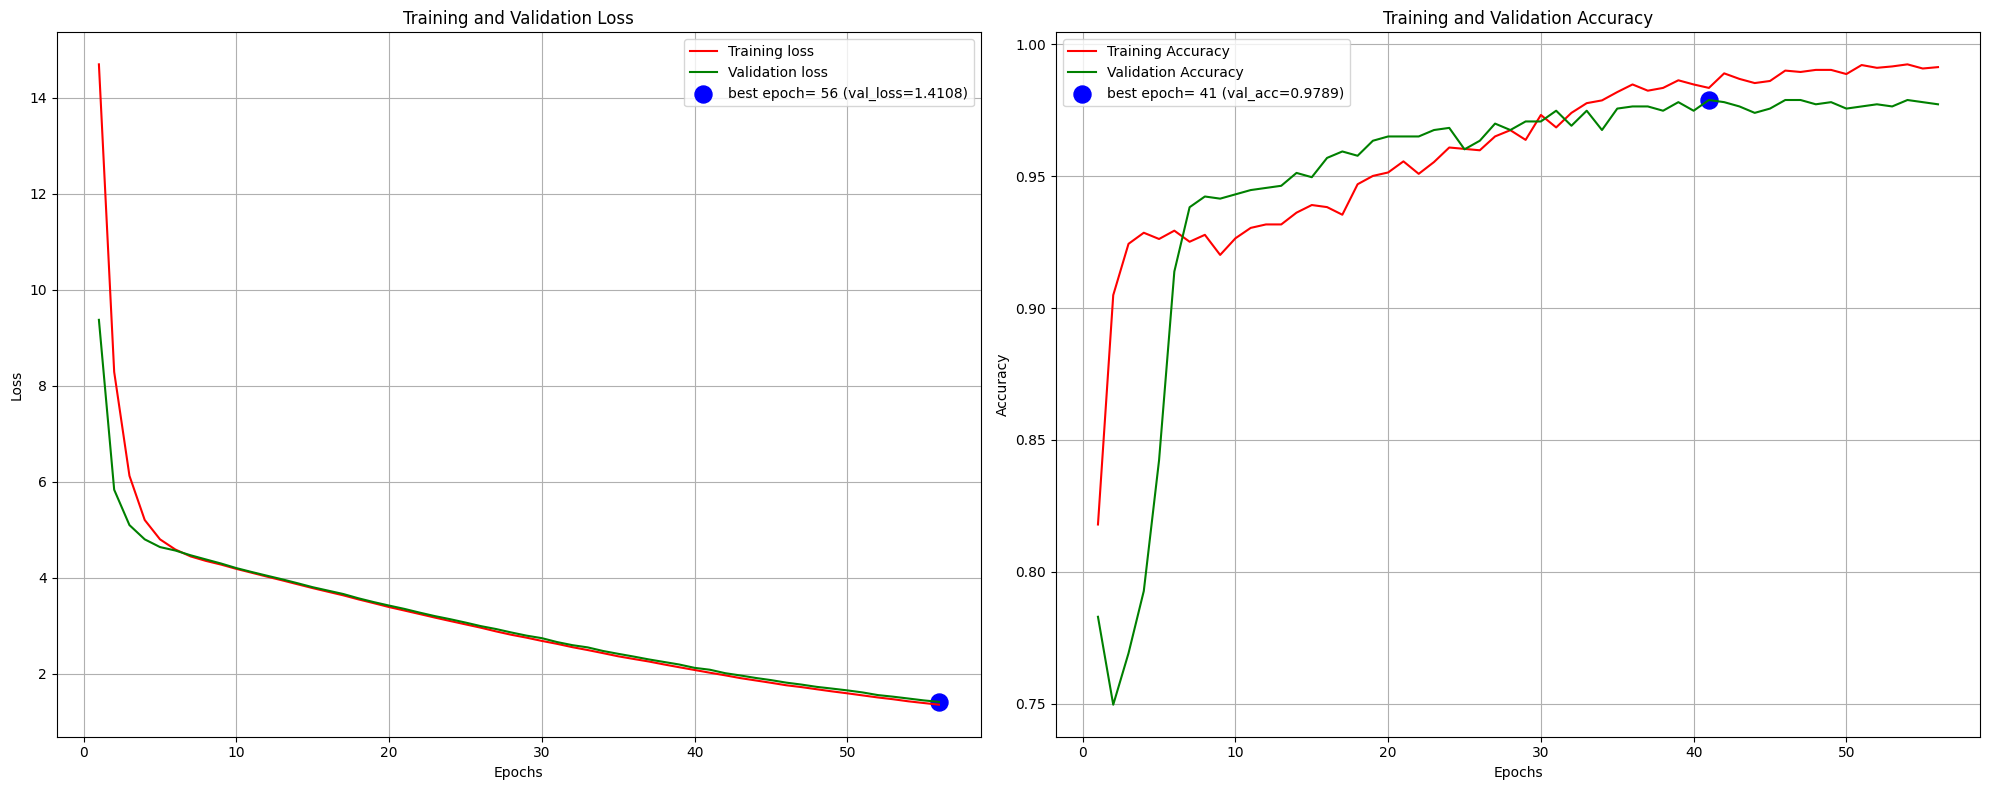

In [68]:
model= build_custom_model(
    EfficientNetB0,
    IMG_SHAPE,
    CLASS_COUNT,
    freeze_percentage=0,
    weights="imagenet",
    pooling="max",
    learning_rate=0.0001,
    plot_file="model_plot.png"
)
# Fit with GPU (Kaggle handles GPU automatically)
history = model.fit(
    train2_gen,
    validation_data=valid2_gen,
    epochs=100,
    verbose=1,
    class_weight= class_weight_dict_mapped,
    callbacks=callbacks
)

# Evaluate on test set
test_loss, test_accuracy = model.evaluate(test2_gen, verbose=1)
print(f"\nTest Accuracy: {test_accuracy:.4f}")
print(f"Test Loss: {test_loss:.4f}")
plot_training_history(history)

In [69]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train2_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid2_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test2_gen, steps= test_steps, verbose= 1)

print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 189ms/step - accuracy: 0.9957 - loss: 2.0675
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 188ms/step - accuracy: 0.9660 - loss: 2.0893
20/20 ━━━━━━━━━━━━━━━━━━━━ 5s 242ms/step - accuracy: 0.9826 - loss: 2.1110
Train Loss:  2.0669972896575928
Train Accuracy:  0.995312511920929
--------------------
Validation Loss:  2.0826404094696045
Validation Accuracy:  0.9750000238418579
--------------------
Test Loss:  2.1169893741607666
Test Accuracy:  0.9780488014221191


<h1 style="color: #63B3ED; font-size: 28px; font-weight: 600; padding-bottom: 8px; border-bottom: 2px solid #4299E1; margin-top: 25px;">
    6. Prediction
</h1>

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
        6.1 Prediction on valid data
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
        Prediction on validation data refers to using a trained model to generate output (class labels or probabilities) for the validation dataset. This helps assess the model's performance before testing, ensuring it generalizes well to unseen data.
</p>
</div>


In [70]:
def predict_and_plot_valid_gen(model, valid_generator=valid_gen, class_names=CLASS_NAMES, max_images=16):
    """
    Predicts and visualizes images from a validation generator.
    Shows true labels, predicted labels, and confidence scores.

    Parameters:
    model (tf.keras.Model): Trained model for prediction.
    valid_generator (tf.keras.preprocessing.image.DirectoryIterator): Validation data generator.
    class_names (list): List of class labels.
    max_images (int, optional): Maximum number of images to display. Default is 16.
    """
    # Fetch a new batch of validation images and labels
    images, true_labels = next(valid_generator)

    # Limit number of images
    num_images = min(max_images, len(images))
    images, true_labels = images[:num_images], true_labels[:num_images]

    # Generate predictions
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    true_labels = np.argmax(true_labels, axis=1)
    confidence_scores = np.max(predictions, axis=1)  # Get highest probability

    # Determine grid size
    cols = min(4, num_images)  # Limit to 4 columns
    rows = math.ceil(num_images / cols)

    # Create figure
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = axes.flatten() if num_images > 1 else [axes]

    # Plot images
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].axis("off")

        true_class = class_names[true_labels[i]]
        pred_class = class_names[predicted_labels[i]]
        confidence = confidence_scores[i] * 100  # Convert to percentage
        color = "green" if true_class == pred_class else "red"

        axes[i].set_title(
            f"Nhãn thực tế: {true_class}\nNhãn dự đoán: {pred_class} ({confidence:.2f}%)",
            fontsize=12,
            color=color
        )

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


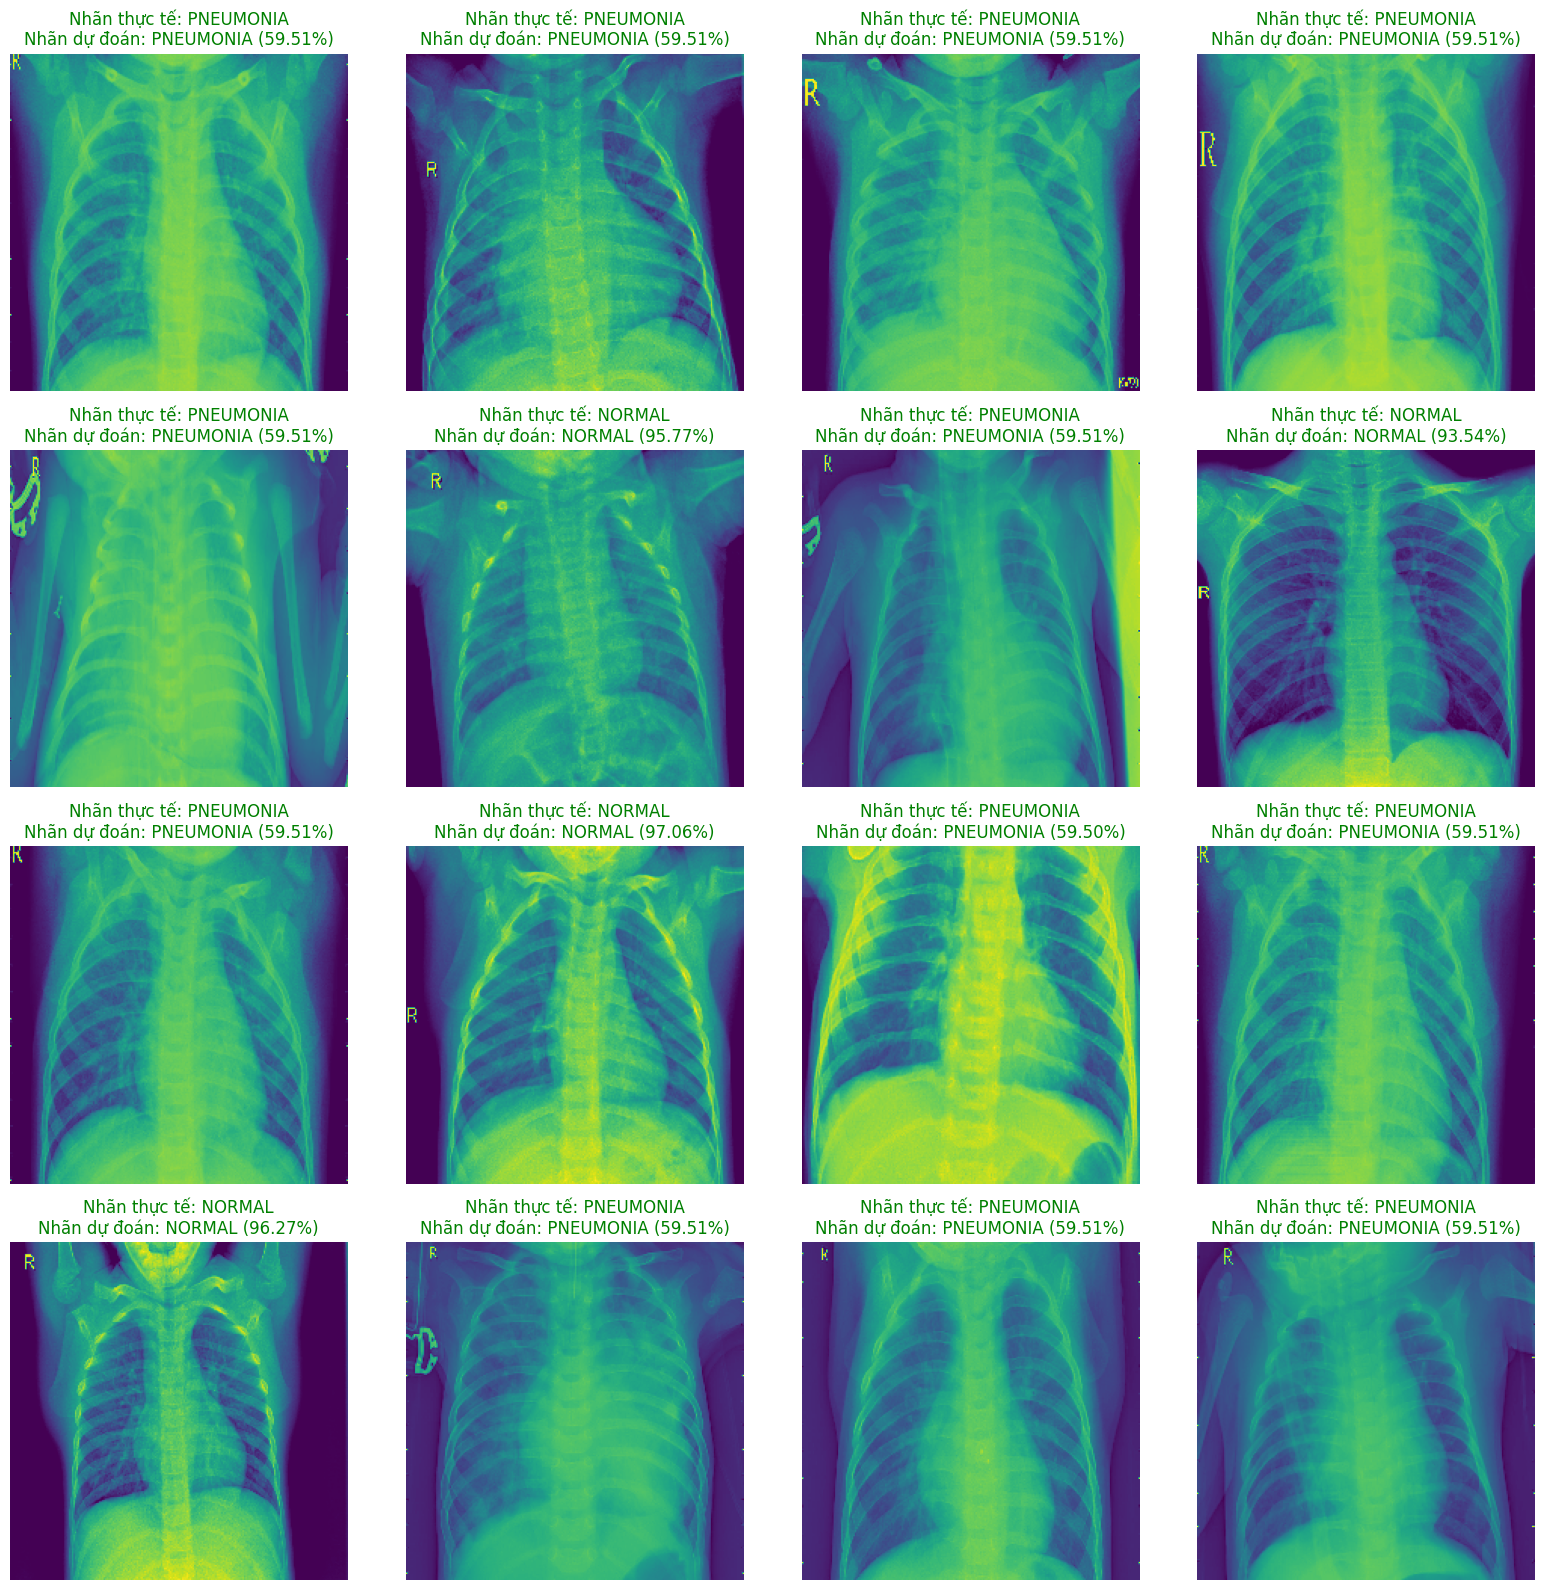

In [83]:
predict_and_plot_valid_gen(model, valid2_gen)

<div style='background-color: rgba(49, 130, 206, 0.1); border-left: 4px solid #3182CE; '>
    <h2 style="background: linear-gradient(90deg, #2A4365 0%, #2C5282 100%); color: #EBF8FF; font-size: 20px; padding: 8px 12px; border-radius: 4px; margin-top: 22px; font-weight: 500;">
        6.2 Prediction on test data
    </h2>
    <p style='padding-left: 20px; padding-bottom: 20px'>
        Prediction on test data involves using a trained model to generate outputs for the test dataset, which the model has never seen before. This evaluates the model’s final performance and generalization ability.
</p>
</div>


In [74]:
def predict_and_plot_test_gen(model, test_generator=test2_gen, class_names=CLASS_NAMES, max_images=16):
    """
    Predicts and visualizes images from a test generator. 
    Ensures a new batch of images is used each time the function runs.

    Parameters:
    model (tf.keras.Model): Trained model for prediction.
    test_generator (tf.keras.preprocessing.image.DirectoryIterator): Test data generator.
    class_names (list): List of class labels.
    max_images (int, optional): Maximum number of images to display. Default is 16.
    """
    # Fetch a new batch of test images
    images, _ = next(test_generator)  # Ignore true labels

    # Limit number of images
    num_images = min(max_images, len(images))
    images = images[:num_images]

    # Generate predictions
    predictions = model.predict(images)
    predicted_labels = np.argmax(predictions, axis=1)
    confidence_scores = np.max(predictions, axis=1)  # Get highest probability

    # Determine grid size
    cols = min(4, num_images)  # Limit to 4 columns
    rows = math.ceil(num_images / cols)

    # Create figure
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 4, rows * 4))
    axes = axes.flatten() if num_images > 1 else [axes]

    # Plot images
    for i in range(num_images):
        axes[i].imshow(images[i])
        axes[i].axis("off")

        pred_class = class_names[predicted_labels[i]]
        confidence = confidence_scores[i] * 100  # Convert to percentage

        axes[i].set_title(
            f"Dự đoán: {pred_class}\nConfidence: {confidence:.2f}%",
            fontsize=12,
            color="blue"
        )

    plt.tight_layout()
    plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


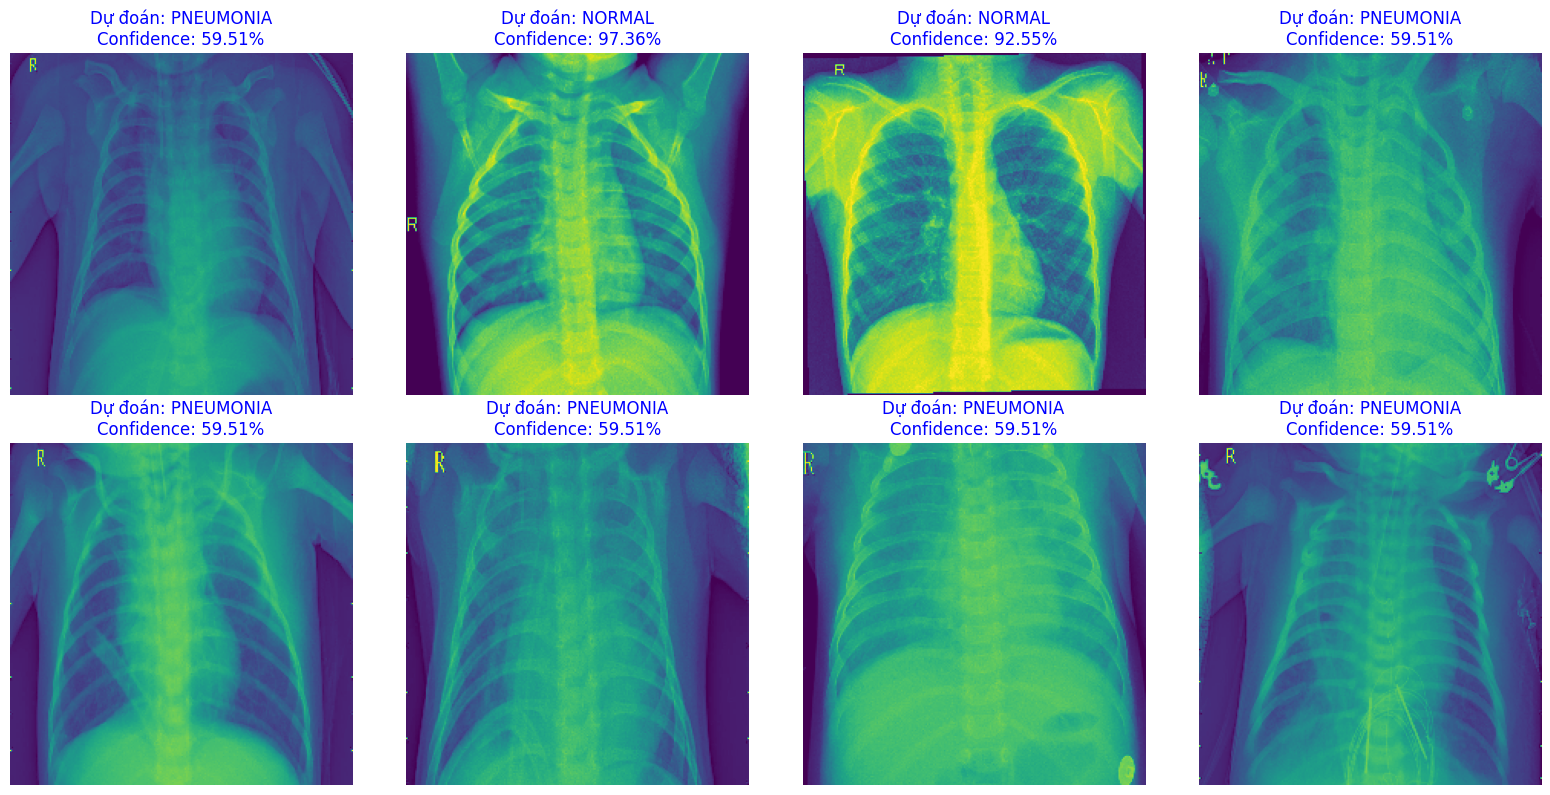

In [77]:
predict_and_plot_test_gen(model, class_names=CLASS_NAMES, max_images=8)